
# <font  color='blue'> Neurophotonic Summer School, Models of Neural Activity <font>

In the first part of this workshop, we present two models of neural activity, the **Hodgkin-Huxley** model and the **leaky integrate and fire** model.

 In the second part we apply these models to describe a network involved in decision making in the zebrafish.

## <font  color='orange'>Mathematical models of neural activity <font>




In this workshop, we will learn about  two mathematical models of neural activity with different levels of complexity.

Keep it mind that:

*All models are wrong, some of them are usefull*

-George E. P. Box

There is always a tradeoff simplicity and descriptive power.

The models you will choose for your research projects will depend on which aspect of neural behaviour you want to focus on, on the level of required details and on computational complexity.

### The Hogkin-Huxley model

The Hodgkin-Huxley has a practical as well as historical importance.

Hodgkin and Huxley received the medicine Nobel prize in 1963 for their work in neuroscience.

An advantage of the Hodgkin Huxley model is that variables and parameters correspond to concrete biophysical entities.



*    Action potential are caused be **sodium** and **potassium** currents.
*   The opening and closing of **sodium** and **potassium** channels is determined by the membrane potential.
*  Sodium channels are regulated by $m$ and $h$ gates.
* Potassium channels are regulated by $n$ gates.


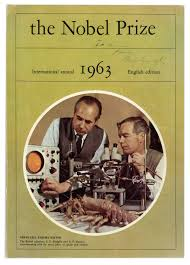

We begin by defining the opening and closing rate  functions for the $m$, $n$ and $h$ gates.

$\alpha$ denotes an opening rate.

$\beta$ denotes a closing rate.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import statistics

def alphan(V):
  #n gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V-25)<0.01:
    V=25.001
  alpha=0.02*(V-25)/(1-math.e**(-(V-25)/9))
  return alpha

def alpham(V):
  #m gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V+35)<0.01:
    V=-35.001
  alpha=0.182*(V+35)/(1-math.e**(-(V+35)/9))
  return alpha

def alphah(V):
  #h gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  alpha=0.25*math.e**(-(V+90)/12)
  return alpha

def betan(V):
  #n gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V-25)<0.01:
    V=25.001
  beta=-0.002*(V-25)/(1-math.e**((V-25)/9))
  return beta

def betam(V):
  #m gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V+35)<0.01:
    V=-35.001
  beta=-0.124*(V+35)/(1-math.e**((V+35)/9))
  return beta

def betah(V):
  #h gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  beta=0.25*math.e**((V+62)/6)/(math.e**((V+90)/12))
  return beta

Let's plot the values of these functions

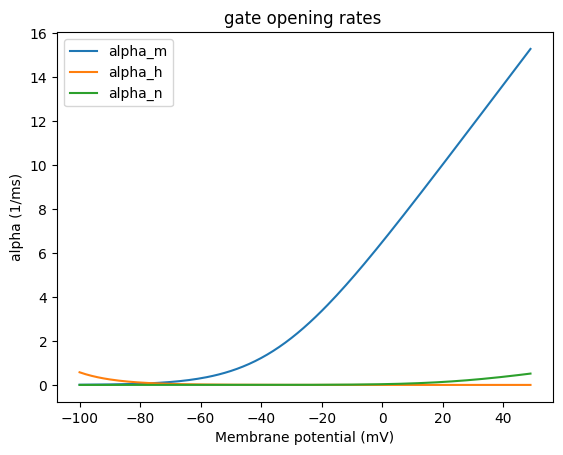

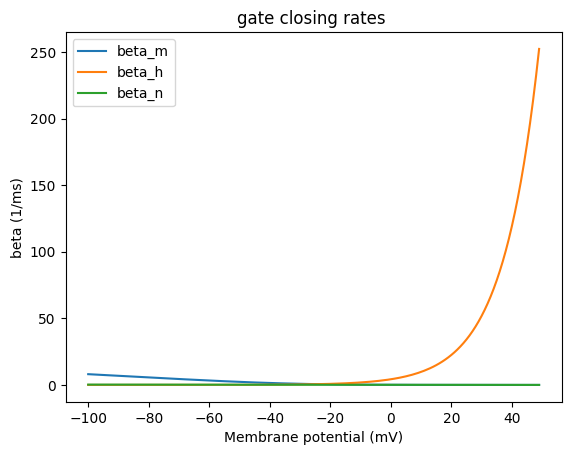

In [2]:
Vvec=[]
alphamvec=[]
alphahvec=[]
alphanvec=[]
betamvec=[]
betahvec=[]
betanvec=[]
for j in range(150):
  V=-100+j
  Vvec.append(V)
  am=alpham(V)
  an=alphan(V)
  ah=alphah(V)
  bm=betam(V)
  bn=betan(V)
  bh=betah(V)

  alphanvec.append(an)
  alphamvec.append(am)
  alphahvec.append(ah)
  betanvec.append(bn)
  betamvec.append(bm)
  betahvec.append(bh)

#plotting the opening rate functions
plt.plot(Vvec,alphamvec,Vvec,alphahvec,Vvec,alphanvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('alpha (1/ms)')
plt.legend(['alpha_m','alpha_h','alpha_n'])
plt.title('gate opening rates ')
plt.show()

plt.plot(Vvec,betamvec,Vvec,betahvec,Vvec,betanvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('beta (1/ms)')
plt.legend(['beta_m','beta_h','beta_n'])
plt.title('gate closing rates ')
plt.show()


The above figures are difficult to interpret.

Explicitely, the dynamics of the gates are given by

$$
\frac{dm}{dt}=(1-m)\alpha_m(V)-m\beta_m(V).
$$
With similar equations for gates of type $n$ and $h$

The equilibrium value ($dm/dt=0$) is given by
$$
m_{eq}(V)=\frac{\alpha_m(V)}{\alpha_m(V)+\beta_m(V)}.
$$

We also have
$$
\frac{dm}{dt}=(m_{eq}(V)-m)(\alpha_m(V)+\beta_m(V)).
$$

We define the time constant
$$
\tau_m(V)=\frac{1}{\alpha_m(V)+\beta_m(V)}.  
$$

With this notation, we can now write
$$
\frac{dm}{dt}=\frac{m_{eq}(V)-m}{\tau_m(V)}.
$$
This form is more easy to interpret.

In [3]:
def meq(V):
  #equilibrium value of the m gate
  #INPUT: V, membrane potential
  #OUTPUT: equi, the equilibrium value
  equi=alpham(V)/(alpham(V)+betam(V))
  return equi

def taum(V):
  #time constant of the m gate
  #INPUT: V, membrane potential
  #OUTPUT:timecst, the time constant of the m gate
  timecst=1/(alpham(V)+betam(V))
  return timecst

def neq(V):
  #Equilibrium value of the n gate
  #INPUT: V, membrane potential
  #OUTPUT: equi, the equilibrium value of the n gate
  equi=alphan(V)/(alphan(V)+betan(V))
  return equi

def taun(V):
  #Time constant of the n gate
  #INPUT: V, membrane potential
  #OUTPUT, timecst, the time constant of the n gate
  timecst=1/(alphan(V)+betan(V))
  return timecst

def heq(V):
  #Equilibrium value of the h gate
  #INPUT:V, membrane potential
  #OUTPUT, equi, equilibrium value of the h gate
  equi=alphah(V)/(alphah(V)+betah(V))
  return equi

def tauh(V):
  #Time constant of the h gate
  #INPUT: V, membrane potential
  #OUTPUT, timecst, time constant of the h gate
  timecst=1/(alphah(V)+betah(V))
  return timecst

let's plot these functions

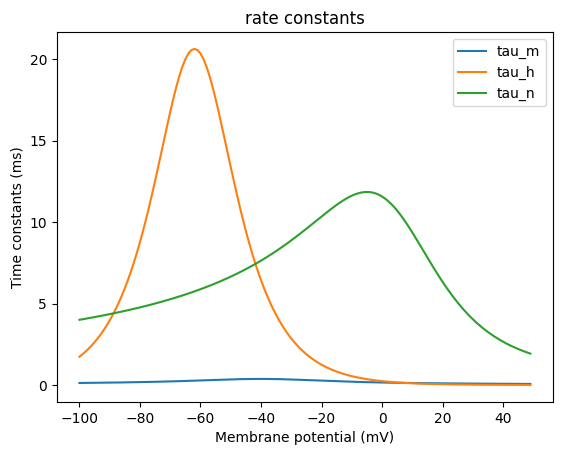

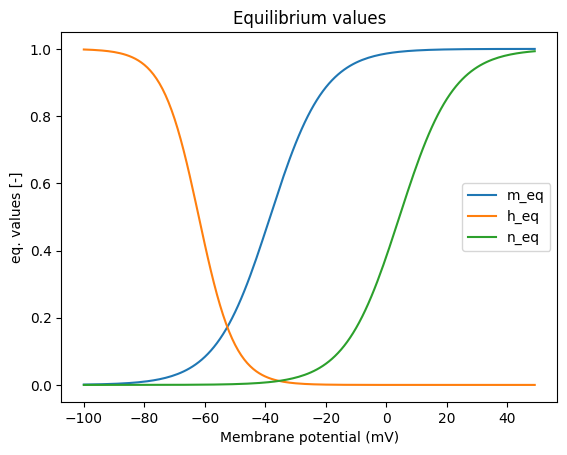

In [4]:
Vvec=[]
taumvec=[]
tauhvec=[]
taunvec=[]
meqvec=[]
heqvec=[]
neqvec=[]
for j in range(150):
  V=-100+j
  Vvec.append(V)
  tm=taum(V)
  tn=taun(V)
  th=tauh(V)
  me=meq(V)
  ne=neq(V)
  he=heq(V)

  taumvec.append(tm)
  tauhvec.append(th)
  taunvec.append(tn)
  meqvec.append(me)
  neqvec.append(ne)
  heqvec.append(he)

#Plotting the time constants
plt.plot(Vvec,taumvec,Vvec,tauhvec,Vvec,taunvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Time constants (ms)')
plt.legend(['tau_m','tau_h','tau_n'])
plt.title('rate constants')
plt.show()

#Plotting the equilibrium values
plt.plot(Vvec,meqvec,Vvec,heqvec,Vvec,neqvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('eq. values [-]')
plt.legend(['m_eq','h_eq','n_eq'])
plt.title('Equilibrium values')
plt.show()


A few observations on these figures


*   The $h$ and $n$ gates have similar time constant.
*   The $m$ gate has a much smaller time constant (it is more rapid).
*   The $m$ and $n$ gates open when the membrane potential depolarizes.  They are *activation* ngates.
*   The $n$ gate closes when the membrane potential depolarizes, it is an *inactivation* gate.

We can now define the full model. It will use the auxiliary functions that we just defined.

A technical word: In Python, when we want to use ordinary differential equations, we begin by writing a function the defines that right-hand side of the ODE system. Then we use a built in solver such as ***odeint*** to obtain the solution.

In [5]:
def HHmodel(y,t,Iinj):
  #Define the right hand side of the equations describing the HH model
  #INPUT:  y a vector of length 4 describing the state of the system.
  #y[0] membrane potential
  #y[1] m gate
  #y[2] n gate
  #y[3] h gate
  #OUTPUT: dydt
  # a vector of length 4 containing the temporal derivative of the variables
  dydt=np.zeros(4)
  V=y[0]
  m=y[1]
  n=y[2]
  h=y[3]

  gna=40
  gk=35
  gL=0.3
  ENa=55
  EK=-77
  EL=-65
  C=1

  I=gna*m*m*m*h*(ENa-V)+gk*n*n*n*n*(EK-V)+gL*(EL-V)+Iinj
  dydt[0]=I/C
  dydt[1]=(meq(V)-m)/taum(V)
  dydt[2]=(neq(V)-n)/taun(V)
  dydt[3]=(heq(V)-h)/tauh(V)
  return dydt




In [6]:
#When solving an ode system, we have to specify initial conditions.
#Here we begin with a membrane potential equal to -60 mV which is a standard resting value
#We start with all gates closed which is arbitrary.
yinit=np.zeros(4)
yinit[0]=-60
yinit[1]=0

#We also have to specify the time interval on which the model will be solved
#First entry: initial time,
#Second entry: final time,
#third entry: number of time points

t = np.linspace(0,1000,10000)



Finally,  ode models have **parameters**.

Contrary to variables which evolve continuously with time, parameters values remain constant trhoughout the simulation.

From a biological perspective, the distinction between variables and parameters is somewhat arbitrary.  Parameters may change on long time scales.

The Hodgkin-Huxley model has many parameter such as sodium conductance, potassium conductance and leak conductance.  

We will focus on the injected current as a parameter of the model.

We expect the following behaviour


*   When there is no injected current or when the injected current is small, the neuron should be in a resting state.
*   When the injected current is strong enough, we should see action potential.


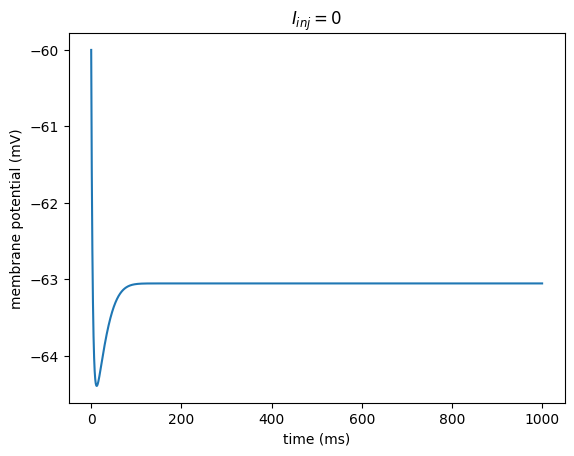

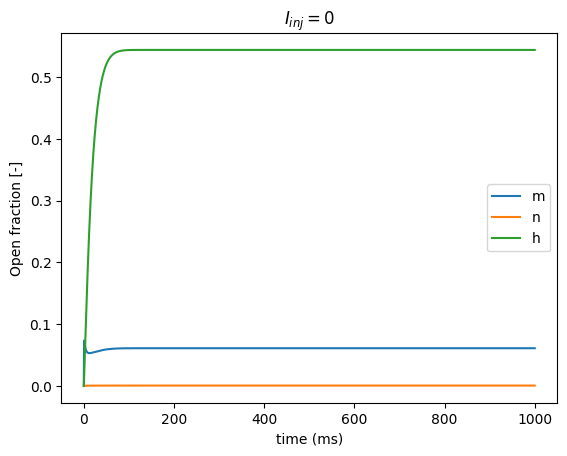

In [8]:
#We first run the model the model with no injected current
Iinj=0
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#Plotting the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('$I_{inj}=0$')
plt.show()

#Plotting the time course of the gating variables
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('$I_{inj}=0$')
plt.legend(['m','n','h'])
plt.show()


Not much happening here...

Let's run with a moderate value of injected current.

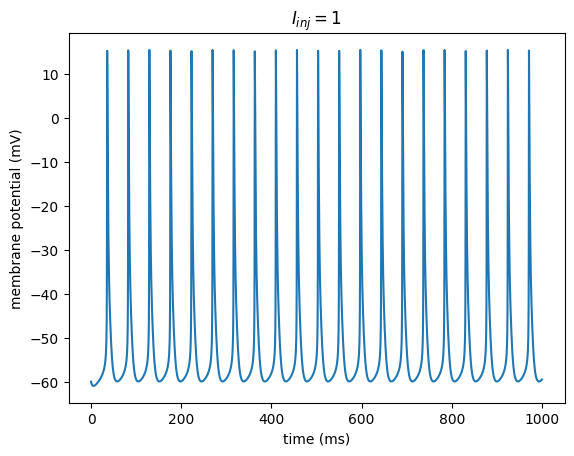

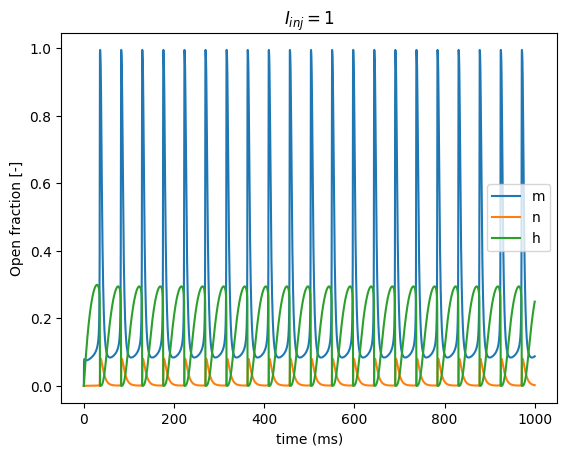

In [10]:
#We specify a moderate value of injected current
Iinj=1
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#We plot the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('$I_{inj}=$' + str(Iinj))
plt.show()

#We plot the time courss of the gating variable
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('$I_{inj}=$' + str(Iinj))
plt.legend(['m','n','h'])
plt.show()


We now observe constant rate spiking.

What happens when the current is further increased?

The answer might be surprising...

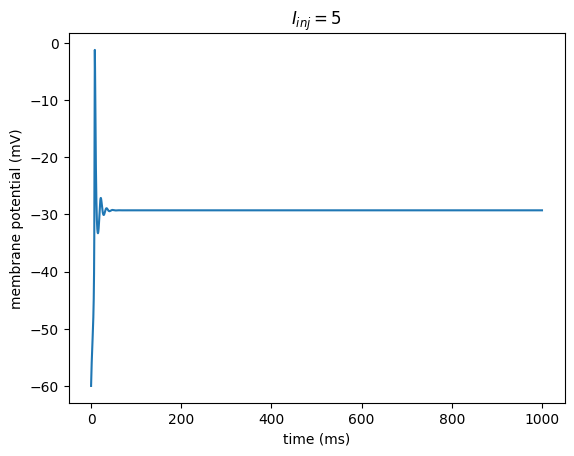

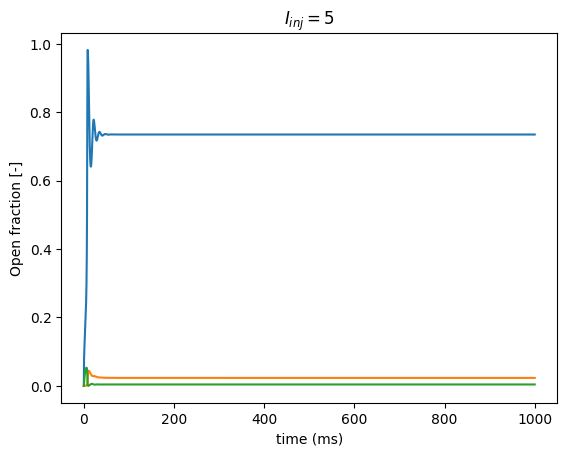

In [11]:
#Specifying a strong value of injected current
Iinj=5
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#Plotting the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('$I_{inj}=5$')
plt.show()

#Plotting the time course of the gating variables.
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('$I_{inj}=5$')
plt.show()


The neuron now converges to a steady state as when there is no injected current. However the steady-state is now more depolarized.

#### <font color='green'> **Exercices related to the Hodgkin Huxley model:**<font>

**1.** We defined

t = np.linspace(0,1000,10000)

That is, we solved the equations on 10000 time points over 1000 ms. This corresponds to a time point every 0.1 ms.

What if we increase or the number of time points?

* Try very high and very low values.

* What happens to the time it takes to solve the problem?

*  What happens to the quality of the solution?

*  Which number of time points would you choose?

2. There is two values of injected current for which we observed sharp transitions. A first transition occurs when the neurons leaves the normal resting state and begins emitting action potentials.  A second transitions occurs when the neuron stops emitting action potential to reach a depolarized steady state.

* Try several values of injected currents.
* Find the values of injected currents for which we observe these transitions.

### Leaky Integrate and Fire (LIF) models

LIF models are one of the simplest class of models describing the spiking behaviour of neurons.

**Assumptions of the LIF model:**

-Neurons emit an action potential when their membrane potential reaches a threshold value.

-The action potential is considered instantaneous.

-After an action potential, the membrane potential is resetted to an hyperpolarized value.

Let's illustrate this with a model of a single neuron into which we inject a constant current.

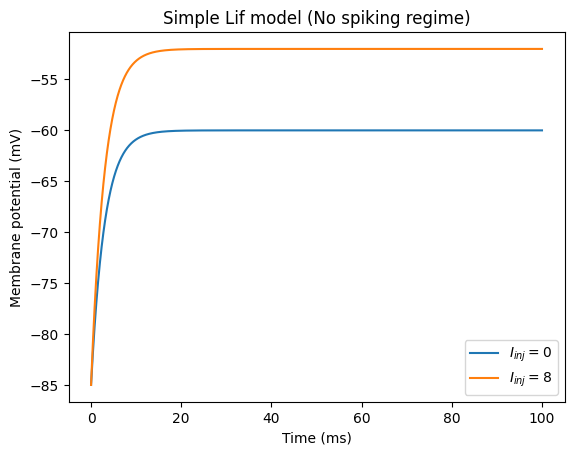

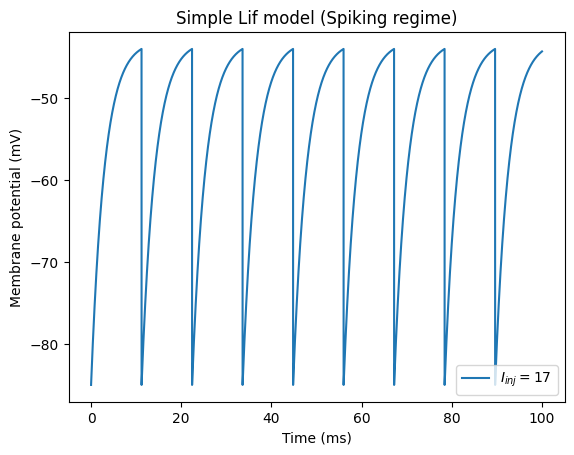

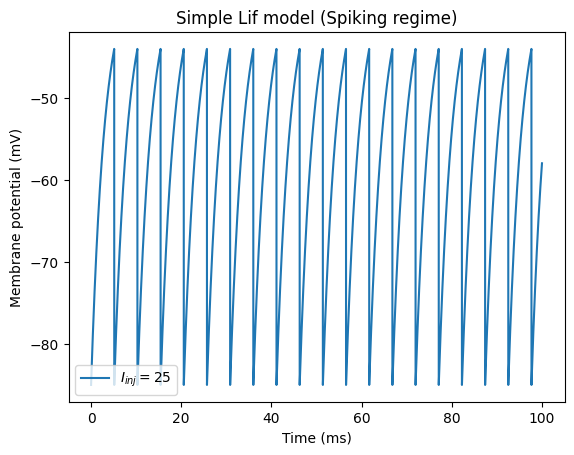

In [12]:
from matplotlib import pyplot as plt
import math

#A single neuron LIF model

def LIF(I_inj):
  #This function computes the response of a single neuron described by a LIF model
  #INPUT: I_inj, a real number, a constant current injected into the cell
  #OUTPUT: Time_Vec, a real vector, the time points of the simulation
  #Vm_Vec, a real vector, the membrane potential

  Sim_dur=100#(ms) duration of the simulation
  dt=0.01#(ms) timestep of the simulation

  Cm=3#(pF) electric capacity of the cell.
  gL=1#(nS)
  EL=-60#(mV)
  Etres=-44#(mV)
  Ereset=-85#(mV)
  time=0
  Vm=60#(mV) initial value of membrane
  Vm_Vec=[]
  Time_Vec=[]
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation

  for j in range(Nstep):
    time=time+dt
    I=I_inj+gL*(EL-Vm)
    Vm=Vm+dt*I/Cm
    if Vm>Etres:
      Vm=Ereset
    Vm_Vec.append(Vm)
    Time_Vec.append(time)

  return Time_Vec, Vm_Vec

#Running the model with different values of injected current
Time_Vec0, Vm_Vec0 =LIF(0)

Time_Vec8, Vm_Vec8 =LIF(8)

Time_Vec17, Vm_Vec17 =LIF(17)

Time_Vec25, Vm_Vec25 =LIF(25)

#Plotting the results
plt.plot(Time_Vec0,Vm_Vec0,Time_Vec8,Vm_Vec8)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (No spiking regime)')
plt.legend(['$I_{inj}=0$', '$I_{inj}=8$'])
plt.show()

plt.plot(Time_Vec17,Vm_Vec17)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (Spiking regime)')
plt.legend(['$I_{inj}=17$'])
plt.show()

plt.plot(Time_Vec25,Vm_Vec25)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (Spiking regime)')
plt.legend(['$I_{inj}=25$'])
plt.show()

**A few remarks**


1.   Qualitatively, the model behaves as expected.  When we increase the injected current, the spiking frequency increases.
2.   Contrary to what was observed in the HH model, the shape of the spikes is no longer described.
3. In the HH model, a very large injected current leads to spike stopping and leads to a depolarized steady state. This is no longer observed in the LIF model.
4. *A technical note*. Since the model is discontinuous,  we cannot solve the equations using the builtin *odeint* function. We have to fix the timestep and solve it over a loop.



Thanks to their simplicity, **LIF** models are often used in **neural networks**.

In this case, when a neuron emits a spike, it increases the synaptic conductance in neurons to which it is connected.

Otherwise synaptic conductances decrease exponentially.

**Synaptic currents** are described similarily as ionic currents.  These currents are equal to the **synpatic conductance** times the **synaptic driving force**. The synaptic driving force is the difference between the membrane potential and the **synpatic potential**.

$$
I_{syn}=g_{syn}(V_m-E_{syn}).
$$

For excitatory synapses, the synaptic potential is more depolarized than the resting potential ($E_{syn}\approx 0$ mV) and for inhibitory synapses, the synaptic  potential is more hyperpolarized than the membrane potential ($E_{syn}\approx -70$ mV)


Let's consider a very simple network of two interconnected excitatory neurons.

In the first neuron, we inject a constant current. The activity of the first neuron will drive the activity of the second one.

Let's consider a very simple network of two interconnected excitatory neurons.

In the first neuron, we inject a constant current. The activity of the first neuron will drive the activity of the second one.

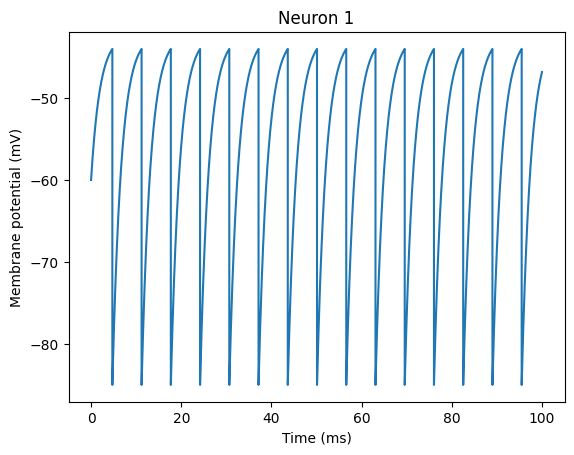

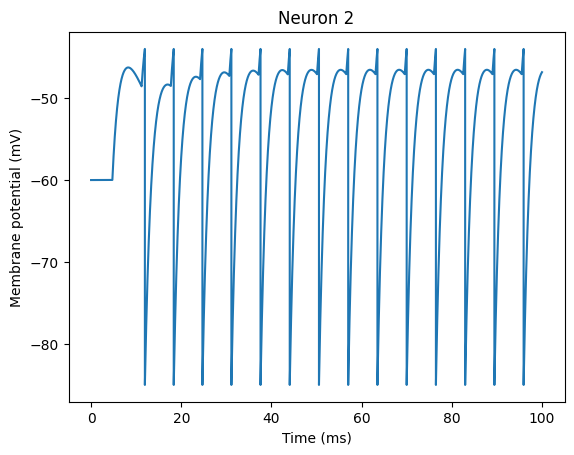

In [13]:
#A two neuron LIF model

def LIF2(I_inj1, I_inj2, w12, w21):
  #this function computes the response of two neurons specified by LIF models
  #INPUT: I_inj1, a real number, the constant current injected into the first neuron.
  #I_inj2, a real number, the constant current injected into the second neuron
  #w12, a real number, the connection strength from neuron 2 to neuron 1.
  #w21, a real number, the connection strength from neuron 1 to neuron 2.
  #OUTPUT Time_Vec, a real vector containing the time points of the simulation.
  # Vm_Vec1,  Vm_Vec2, real vectors, the membrane potentials of neuron 1 and 2 respectively.
  #gsyn_Vec1, gsyn_Vec2,real vectors, synaptic conductances in neurons 1 and 2 respectively.
  #Spike_time1,  real vector, the times of action potentials in neuron 1.
  #Spike1, a vector of integers, contains as many ones as the number of spikes of neuron 1.
  #Spike_time2, Spike2.  Same but for neuron 2.

  #Properties of the simulation
  Sim_dur=100#(ms) duration of the simulation
  dt=0.001#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Properties of the first neuron
  Cm1=3#(pF) electric capacity of the cell
  gL1=1.5#(nS)
  EL1=-60#(mV)
  Etres1=-44#(mV)
  Ereset1=-85#(mV)
  Vm1=-60#(mV) initial value of membrane potential
  Vm_Vec1=[]

  #Properties of the second neuron
  Cm2=3#(pF) electric capacity of the cell.
  gL2=1#(nS)
  EL2=-60#(mV)
  Etres2=-44#(mV)
  Ereset2=-85#(mV)
  Vm2=-60#(mV) initial value of membrane potential
  Vm_Vec2=[]

  #Synaptic properties
  tauSyn=5#(ms)
  Esyn=0 #(mV)
  gsyn1=0#(nS)
  gsyn2=0#(nS)
  gsyn_Vec1=[]
  gsyn_Vec2=[]

  Spike_time1=[]
  Spike1=[]

  Spike_time2=[]
  Spike2=[]

  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I1=I_inj1+gL1*(EL1-Vm1)+gsyn1*(Esyn-Vm1)
    I2=I_inj2+gL2*(EL2-Vm2)+gsyn2*(Esyn-Vm2)
    Vm1=Vm1+dt*I1/Cm1
    Vm2=Vm2+dt*I2/Cm2
    gsyn1=gsyn1-dt*gsyn1/tauSyn
    gsyn2=gsyn2-dt*gsyn2/tauSyn

    if Vm1>Etres1:
      Vm1=Ereset1
      Spike_time1.append(time)
      Spike1.append(1)
      gsyn2=gsyn2+w21

    if Vm2>Etres2:
      Vm2=Ereset2
      Spike_time2.append(time)
      Spike2.append(2)
      gsyn1=gsyn1+w12
    Vm_Vec1.append(Vm1)
    Vm_Vec2.append(Vm2)
    Time_Vec.append(time)
    gsyn_Vec1.append(gsyn1)
    gsyn_Vec2.append(gsyn2)

  return Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2

Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2(26.5, 0, 0, 0.6)


#Plotting the results
plt.plot(Time_Vec,Vm_Vec1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 1')
plt.show()


plt.plot(Time_Vec,Vm_Vec2)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 2')
plt.show()




A **raster plot** is a practical way to visualise the data.

The time is on the x axis, the neuron index is on the y axis and each spike is represented by a black dot.

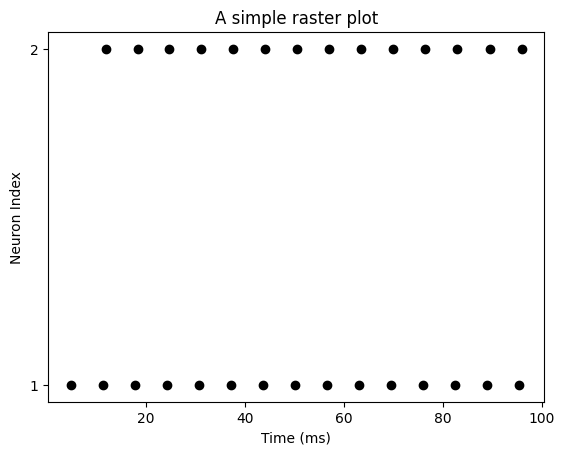

In [14]:
plt.plot(Spike_time1,Spike1,'ko',Spike_time2,Spike2,'ko')
plt.xlabel('Time (ms)')
plt.yticks((1,2))
plt.ylabel('Neuron Index')
plt.title('A simple raster plot')
plt.show()

We observe that there is a 1 to 1 ratio between the spikes of the first and the second neuron.

The spikes of the second neuron occur after a small delay.

#### <font color='green'> **Exercice related to the LIF model:**<font>

If you change the strength of the synaptic connection, do you still observe a one to one response?


It can be interesting to investigate the relation between the input strength and the firing frequencies.

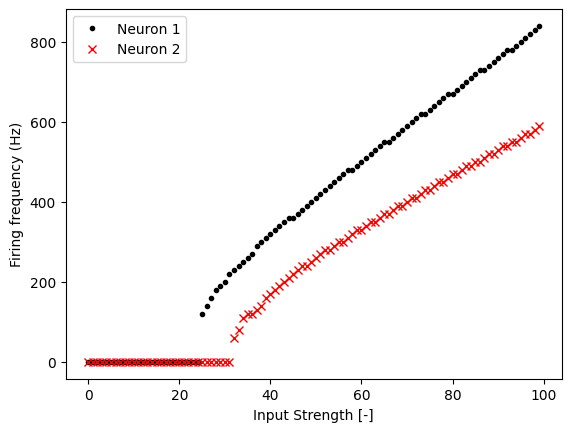

In [15]:
Input_Vec=[]
Freq1_Vec=[]
Freq2_Vec=[]

#Running the simulation for different values of injected currents
for j in range(100):
  Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2(j, 0, 0, 0.3)
  Input_Vec.append(j)
  Freq1_Vec.append(10*len(Spike1))
  Freq2_Vec.append(10*len(Spike2))

#Plotting the result
plt.plot(Input_Vec,Freq1_Vec,'.k',Input_Vec, Freq2_Vec,'xr')
plt.xlabel('Input Strength [-]')
plt.ylabel('Firing frequency (Hz)')
plt.legend(['Neuron 1','Neuron 2'])
plt.show()

**Remark:**  The firing rates in this example are unphysiologically large.  

One way to correct this is to add a *refractory period*.   This describes the fact that neurons cannot fire another action potential just after firing.

The existence of a refractory period is related to the dynamics of voltage-gated channels.

The refractory period lasts a few milliseconds (1-5 ms).

Also, the transmission of the action potential is not instantaneous. There is a  another delay due to the synaptic transmission itself.

In the next code, we will add a refractory period of 2 ms, we will  also add a transmission delay of 5 ms.


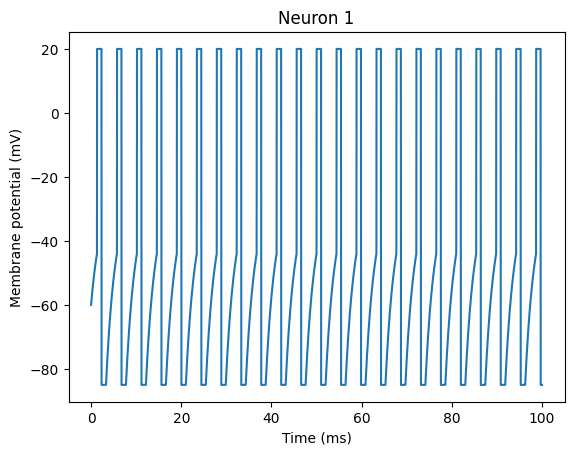

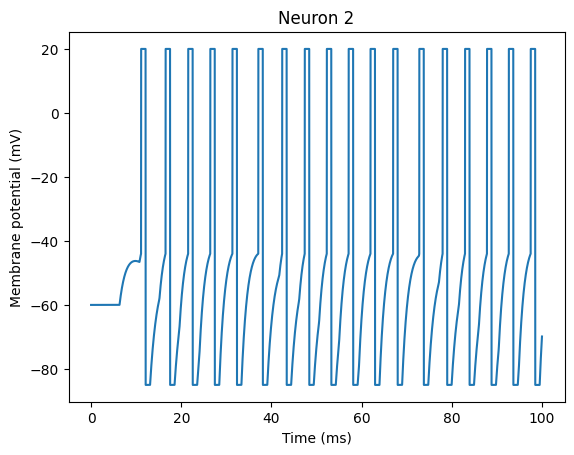

In [16]:
#A two neuron LIF model with refractory period and transmission delay

def LIF2ref(I_inj1, I_inj2, w12, w21):
  #this function computes the response of two neurons specified by LIF models taking into account a refractory period and a transmission delay.
  #INPUT: I_inj1, a real number, the constant current injected into the first neuron.
  #I_inj2, a real number, the constant current injected into the second neuron
  #w12, a real number, the connection strength from neuron 2 to neuron 1.
  #w21, a real number, the connection strength from neuron 1 to neuron 2.
  #OUTPUT Time_Vec, a real vector containing the time points of the simulation.
  # Vm_Vec1,  Vm_Vec2, real vectors, the membrane potentials of neuron 1 and 2 respectively.
  #gsyn_Vec1, gsyn_Vec2,real vectors, synaptic conductances in neurons 1 and 2 respectively.
  #Spike_time1,  real vector, the times of action potentials in neuron 1.
  #Spike1, a vector of integers, contains as many ones as the number of spikes of neuron 1.
  #Spike_time2, Spike2.  Same but for neuron 2.

  #Properties of the simulation
  Sim_dur=100#(ms) duration of the simulation
  dt=0.001#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Properties of the first neuron
  Cm1=3#(pF) electric capacity of the cell.
  gL1=1.5#(nS)
  EL1=-60#(mV)
  Etres1=-44#(mV)
  Ereset1=-85#(mV)
  Vm1=-60#(mV) initial value of membrane potential
  ref1=2#(ms) refractory period for neuron 1
  Vm_Vec1=[]


  #Properties of the second neuron
  Cm2=3#(pF) electric capacity of the cell.
  gL2=1#(nS)
  EL2=-60#(mV)
  Etres2=-44#(mV)
  Ereset2=-85#(mV)
  Vm2=-60#(mV) initial value of membrane potential
  ref2=2#(ms) refractory period for neuron 2
  Vm_Vec2=[]

  #Synaptic properties
  tauSyn=5#(ms)
  Esyn=0#(mV)
  gsyn1=0#(nS)
  gsyn2=0#(nS)
  gsyn_Vec1=[]
  gsyn_Vec2=[]
  syn_delay=5#(ms) transmission delay
  Espike=20

  Spike_time1=[]
  Spike1=[]
  Last_Spike1=-100#(ms)
  Spike_Not_Sent1=[]


  Spike_time2=[]
  Spike2=[]
  Last_Spike2=-100#(ms)
  Spike_Not_Sent2=[]

  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I1=I_inj1+gL1*(EL1-Vm1)+gsyn1*(Esyn-Vm1)
    I2=I_inj2+gL2*(EL2-Vm2)+gsyn2*(Esyn-Vm2)
    if ((time-Last_Spike1)<ref1) and ((time-Last_Spike1)>ref1/2):
      Vm1=Ereset1

    if (time-Last_Spike1)>ref1:
      Vm1=Vm1+dt*I1/Cm1

    if (time-Last_Spike2)>ref2:
      Vm2=Vm2+dt*I2/Cm2
    gsyn1=gsyn1-dt*gsyn1/tauSyn
    gsyn2=gsyn2-dt*gsyn2/tauSyn

    if ((Vm1>Etres1) and (Vm1<Espike)):
      Vm1=Espike
      Spike_time1.append(time)
      Spike1.append(1)
      Spike_Not_Sent1.append(time)
      Last_Spike1=time

    L=len(Spike_Not_Sent1)
    if L>0:
      if ((time-Spike_Not_Sent1[0])>=syn_delay) and ((time-Spike_Not_Sent1[0]-dt)<syn_delay):
        gsyn2=gsyn2+w21
        Spike_Not_Sent1.pop(0)

    if ((Vm2>Etres2) and (Vm2<Espike)):
      Vm2=Espike
      Spike_time2.append(time)
      Spike2.append(2)
      Last_Spike2=time

    if ((time-Last_Spike2)<ref2) and ((time-Last_Spike2)>ref2/2):
      Vm2=Ereset2

    L=len(Spike_Not_Sent2)
    if L>0:
      if ((time-Spike_Not_Sent2[0])>=syn_delay) and ((time-Spike_Not_Sent2[0]-dt)<syn_delay):
        gsyn1=gsyn1+w12
        Spike_Not_Sent2.pop(0)

    Vm_Vec1.append(Vm1)
    Vm_Vec2.append(Vm2)
    Time_Vec.append(time)
    gsyn_Vec1.append(gsyn1)
    gsyn_Vec2.append(gsyn2)

  return Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2

#Launching the simulation
Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2ref(50, 0, 0, 0.6)

#Plotting the result
plt.plot(Time_Vec,Vm_Vec1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 1')
plt.show()

plt.plot(Time_Vec,Vm_Vec2)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 2')
plt.show()


Let's look at the impact of adding a refractory period and transmission delay the raster plot. `

*Hint:* it should decrease the firing rate.

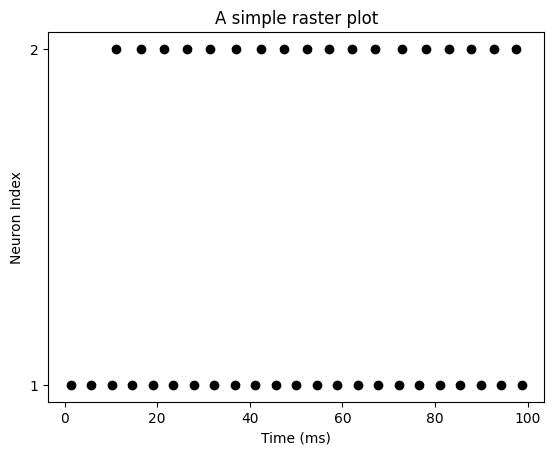

In [17]:
plt.plot(Spike_time1,Spike1,'ko',Spike_time2,Spike2,'ko')
plt.xlabel('Time (ms)')
plt.yticks((1,2))
plt.ylabel('Neuron Index')
plt.title('A simple raster plot')
plt.show()

**Observation:** There is no longer a 1 to response of the second neuron to the activity of the first one.

Let's now look at the input-frequency relation for the model with refractory periods.

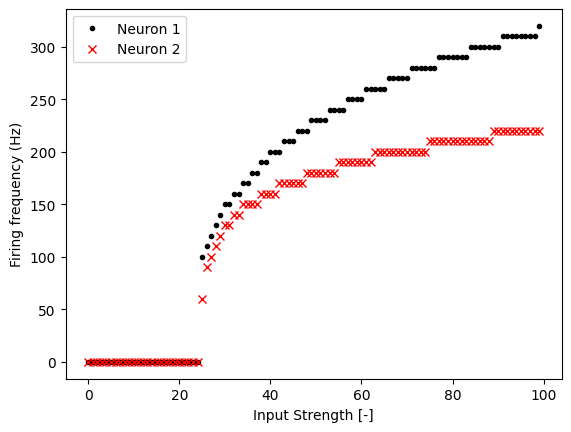

In [18]:
Input_Vec=[]
Freq1_Vec=[]
Freq2_Vec=[]

#Lauching the simulation for different values of injected current
for j in range(100):
  Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2ref(j, 0, 0, 0.6)
  Input_Vec.append(j)
  Freq1_Vec.append(10*len(Spike1))
  Freq2_Vec.append(10*len(Spike2))

#Plotting the results
plt.plot(Input_Vec,Freq1_Vec,'.k',Input_Vec, Freq2_Vec,'xr')
plt.xlabel('Input Strength [-]')
plt.ylabel('Firing frequency (Hz)')
plt.legend(['Neuron 1','Neuron 2'])
plt.show()


The refractory period indeed causes a reduction in firing frequency.

###  LIF models for arbitrarily large networks

Let's now move to a more complex and more interesting example.

We consider a network with 50 excitatory neurons and 50 inhibitory neurons.

We first consider a network with random excitatory and inhibitory connections and with random noisy input.

We first define a function that will take external inputs and connectivity matrix as arguments.

This function returns the activity of neurons.

In [19]:
import random as rnd

#A network LIF model with refractory period

def LIFNetwork(I_inj, ConnectMat,N_Neurons, Sim_dur, freq, noise_amp):
  #This function computes the activity of many neurons each described by a LIF model
  #This function also simulates the calcium fluorescence response
  #INPUT: I_inj, a real vector, the constant current injected in each neuron.
  #ConnectMat, a real matrix, the strength of connections between neurons
  #Sim_dur, a positive real number, the duration of the simulation
  #freq, a real number, the frequency of the sinusoidal input
  #noise_amp, the noise amplitude of the input
  #OUTPUT:Time_Vec, a real vector, the time points of the simulation
  #Vm_Vec, a real matrix, membrane potential of each neuron at each time point
  #gsynExc_Vec, gsynInh_Vec,real vectors, the synaptic conductances of each neuron at each time step
  #Spike_time, real matrix, the time of spike of each neuron.
  #Spike, a matrix of integer, the inidices of neurons spiking
  #Cal_Flu_Vec, a real matrix, the fluorescence of each neuron at each time step

  #Properties of the simulation
  dt=0.01#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Electrical properties of neurons
  Cm=3#(pF) electric capacity of the cell.
  gL=1.5#(nS)
  EL=-60#(mV)
  Etres=-44#(mV)
  Ereset=-85#(mV)
  Espike=20#(mV)
  ref=2#(ms) refractory period
  Vm_Vec=[]
  Vm=[]

  Sing_Spike_Cal=0.05#Relative fluoresce due to a single spike
  Cal_Flu_tau=100# (ms)Time constant of fluorescence

  Cal_Flu=[]
  Cal_Flu_Vec=[]

  for j in range(N_Neurons):
    Cal_Flu.append(0)
    Cal_Flu_Vec.append([])

  for j in range(N_Neurons):
    Vm.append(-60)#(mV) initial value of membrane
    Vm_Vec.append([])


  #Synaptic properties
  tauSynExc=5#(ms)
  tauSynInh=10#(ms)
  EsynExc=0
  EsynInh=-70
  syn_delay=5#(ms) transmission delay
  gsynExc=[]
  gsynInh=[]
  gsynExc_Vec=[]
  gsynInh_Vec=[]
  Spike_time=[]
  Spike=[]
  Last_Spike=[]#-100#(ms)
  Spike_Not_Sent=[]

  for j in range(N_Neurons):
    gsynExc.append(0)
    gsynInh.append(0)
    gsynExc_Vec.append([])
    gsynInh_Vec.append([])
    Last_Spike.append(-100)
    Spike.append([])
    Spike_Not_Sent.append([])
    Spike_time.append([])


  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I=[]
    for k in range(N_Neurons):
      Inp=I_inj[k]*(1+np.sin(2*np.pi*time*freq/1000))*(1+noise_amp*(rnd.random()-0.5))
      I.append(Inp+gL*(EL-Vm[k])+gsynExc[k]*(EsynExc-Vm[k])+gsynInh[k]*(EsynInh-Vm[k]))

      if (((time-Last_Spike[k])>ref/2) and ((time-Last_Spike[k])<ref)):
        Vm[k]=Ereset

      if (time-Last_Spike[k])>ref:
        Vm[k]=Vm[k]+dt*I[k]/Cm

      gsynExc[k]=gsynExc[k]-dt*gsynExc[k]/tauSynExc
      gsynInh[k]=gsynInh[k]-dt*gsynInh[k]/tauSynInh

      Cal_Flu[k]=Cal_Flu[k]-dt*Cal_Flu[k]/Cal_Flu_tau

      if ((Vm[k]>Etres) and (Vm[k]<Espike)):
        #Vm[k]=Ereset
        Vm[k]=Espike
        Spike_time[k].append(time)
        Spike[k].append(k)
        Spike_Not_Sent[k].append(time)
        Last_Spike[k]=time
        Cal_Flu[k]=Cal_Flu[k]+Sing_Spike_Cal


      L=len(Spike_Not_Sent[k])
      if L>0:
        if ((time-Spike_Not_Sent[k][0])>=syn_delay) and ((time-Spike_Not_Sent[k][0]-dt)<syn_delay):

          for s in range(N_Neurons):
            if ConnectMat[s][k]>0:
              gsynExc[s]=gsynExc[s]+ConnectMat[s][k]
            if ConnectMat[s][k]<0:
              gsynInh[s]=gsynInh[s]-ConnectMat[s][k]

          Spike_Not_Sent[k].pop(0)

      Vm_Vec[k].append(Vm[k])
      Cal_Flu_Vec[k].append(Cal_Flu[k])
      gsynExc_Vec[k].append(gsynExc[k])
      gsynInh_Vec[k].append(gsynInh[k])
    Time_Vec.append(time)

  return Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec


Let's define the connectivity matrix and the input vector.

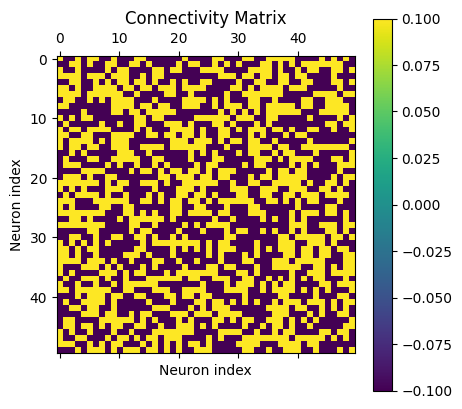

In [20]:
import numpy as np

#Define the connectivity matrix

N_Neurons=50

p=1
pexc=0.5
ConnectMat=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons):
  for k in range(N_Neurons):
    R1=rnd.random()
    if R1<p:
      R2=rnd.random()
      if R2<pexc:
        ConnectMat[k][j]=0.1
      if R2>pexc:
        ConnectMat[k][j]=-0.1



#Define the input vector
Inp=np.zeros(N_Neurons)
for j in range(N_Neurons):
  pinp=0.5
  R=rnd.random()
  if R<pinp:
    Inp[j]=25

#Display the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()



Let's now run the simulation

In [21]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,500,0,0.2)

And generate the raster plot of the response

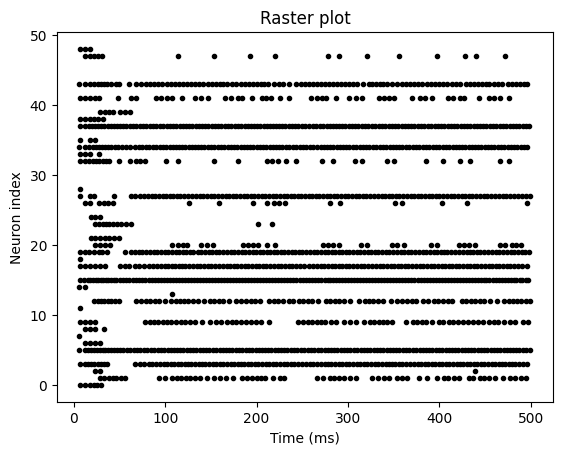

In [22]:
#Generating the raster plot
for j in range(50):
  plt.plot(Spike_time[j],Spike[j],'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()


We observe a wide variety of behaviours over the neurons.

Some fire with high frequency, some don't fire at all, and interestingly some of irregular responses.

We can also display a heatmap of the neurons membrane potential.

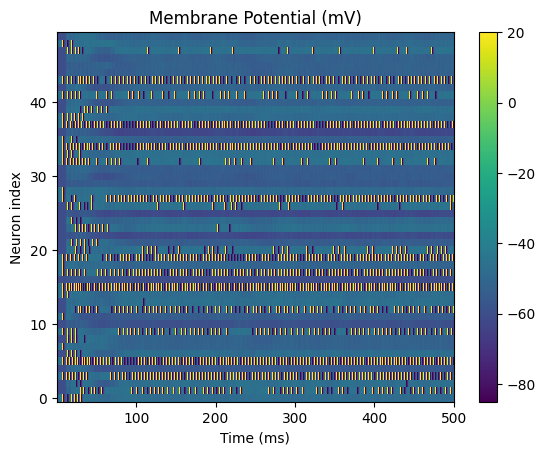

In [23]:
plt.pcolormesh(Time_Vec,range(50),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

In practice, it is difficult to measure individul spikes or membrane potential of each neuron in a network.

Measurement of neural activity is often made indirectly with the use of fluorescent dyes that are sensitive to calcium concentration.

Intracellular calcium concentration increases sharply just after an action potential, it can thus be used as a proxy for neural activity

Since the dynamics of calcium concentration is slower, it corresponds to a time smoothed representation of neural activity.

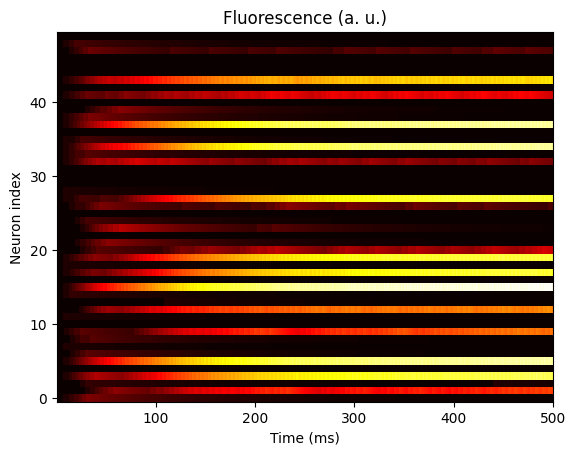

In [24]:
plt.pcolormesh(Time_Vec,range(50),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

This type of completely random neural network is very unphysiological.

We now consider a multi layer network, in which neurons of a layer are randomly connected to the neurons of the next layer.

This is a feedforward network.

We consider only excitatory connections.

We consider a sinusoidal input injected in neurons of the first layer.

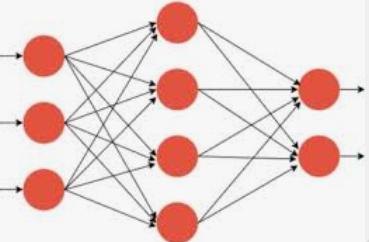

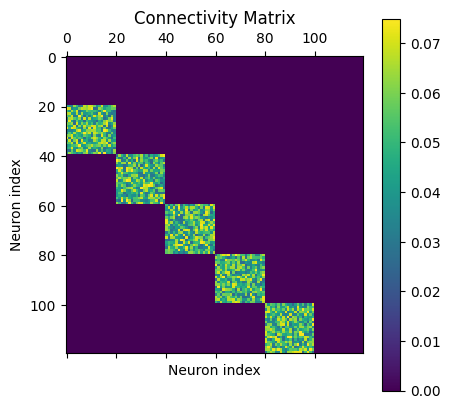

In [25]:
#Define the connectivity matrix

N_Neurons_L1=20
N_Neurons_L2=20
N_Neurons_L3=20
N_Neurons_L4=20
N_Neurons_L5=20
N_Neurons_L6=20

N_Neurons=N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+N_Neurons_L5+N_Neurons_L6
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
strength=0.05
for j in range(N_Neurons_L1):
  for k in range(N_Neurons_L2):
    ConnecMatExc[N_Neurons_L1+k][j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L2):
  for k in range(N_Neurons_L3):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+k][N_Neurons_L1+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L3):
  for k in range(N_Neurons_L4):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+k][N_Neurons_L1+N_Neurons_L2+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L4):
  for k in range(N_Neurons_L5):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+k][N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L5):
  for k in range(N_Neurons_L6):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+N_Neurons_L5+k][N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+j]=strength+strength*(rnd.random()-0.5)


ConnecMatInh=np.zeros((N_Neurons,N_Neurons))

ConnectMat=ConnecMatExc-ConnecMatInh

#Define the input vector
Inp=np.zeros(120)
for j in range(N_Neurons_L1):
  Inp[j]=15

#Display the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()


We can now launch the simulation

In [26]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,10,0)

And generate the raster plot of the response

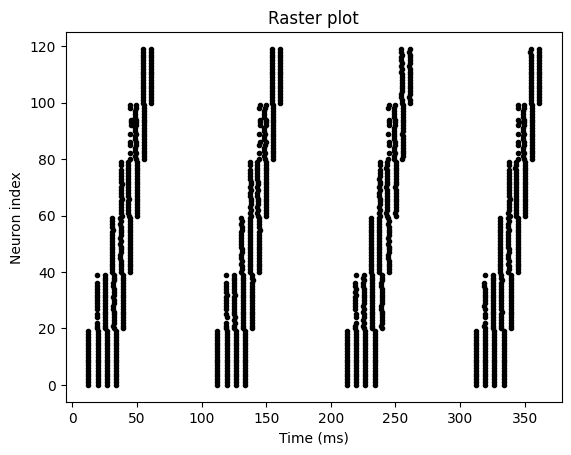

In [27]:
#Generating the raster plot
for j in range(120):
  plt.plot(Spike_time[j],Spike[j],'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

We see the signal propagating through the layers of the network.

We can also display a heatmap of the membrane potential of all neurons.

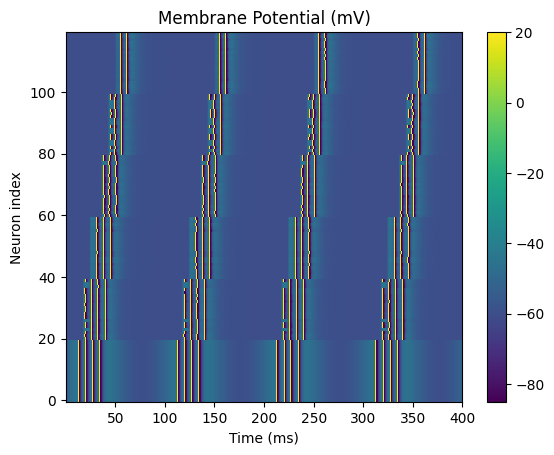

In [28]:
plt.pcolormesh(Time_Vec,range(120),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

And the simulated fluorescence response

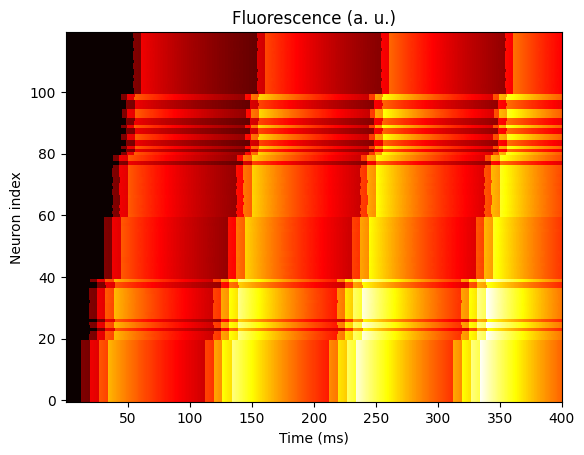

In [29]:
plt.pcolormesh(Time_Vec,range(120),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

#### <font color='green'> **Exercice related to the feedforward LIF network:**<font>

What is the impact of changing the strengths of the connections?

We now consider a network with **an inhibitory feedback loop**.  

We divide the neurons in excitatory and inhibitory neurons.

The connectivity matrix describing the network is a *stochastic block model*.

An external current is injected in the excitatory neurons.

Excitatory neurons excite inhibitory ones.

Inhibitory neurons send inhibitory connections to excitatory ones.

There is no connections between two excitatory neurons or between two inhibitory neurons.

We update the connection matrix and injected currents

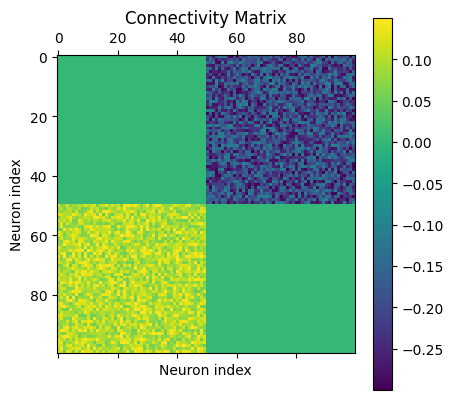

In [30]:
#Updating the connection matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.2+0.2*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Displaying the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()


We can now launch the simulation

In [31]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,0,0)

And plot the results

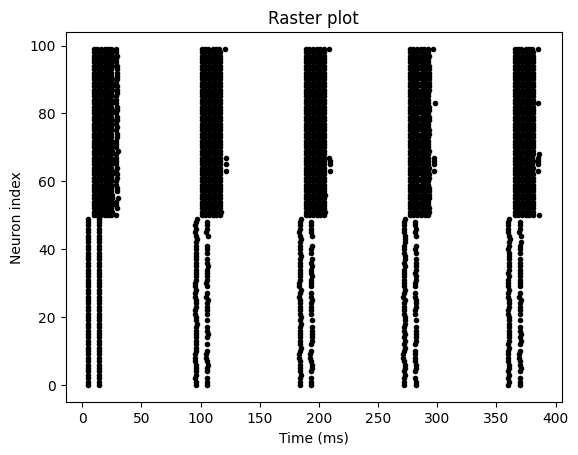

In [32]:
#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

As we did in the section on the bursting Morris-Lecar model, we observed **bursting**.

However, in this example, the bursting is not due to intrinsec neural properties but to network effects.

The presence of an **inhibitory feedback loop** often causes **oscillations** that is alternance between periods of activity and neural silence.

We can also display a heatmap of the membrane potential of all neurons.

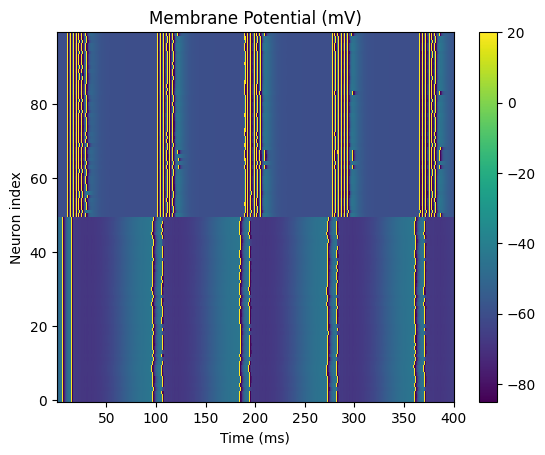

In [33]:
plt.pcolormesh(Time_Vec,range(100),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

We can also plot the simulated fluorescence response

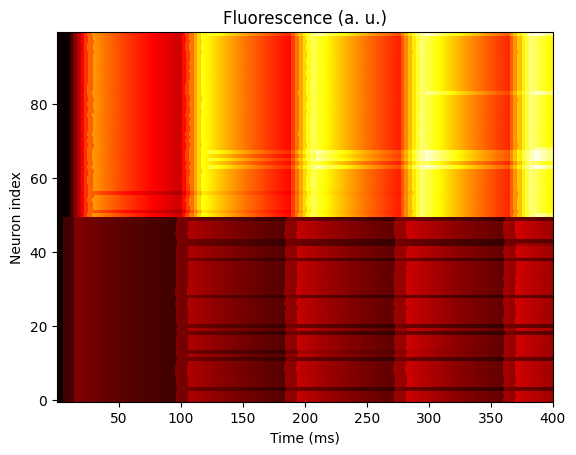

In [34]:
plt.pcolormesh(Time_Vec,range(100),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

Let's decrease the strength of inhibitory connections and see what happens.

First, we redefine the connection matrix and input vector.

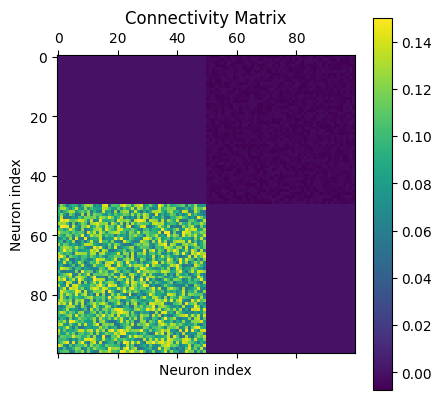

In [35]:
#Updating the connection matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.005+0.005*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Displaying the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()

Let's relaunch the simulation

In [36]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,0,0)

And plot the results

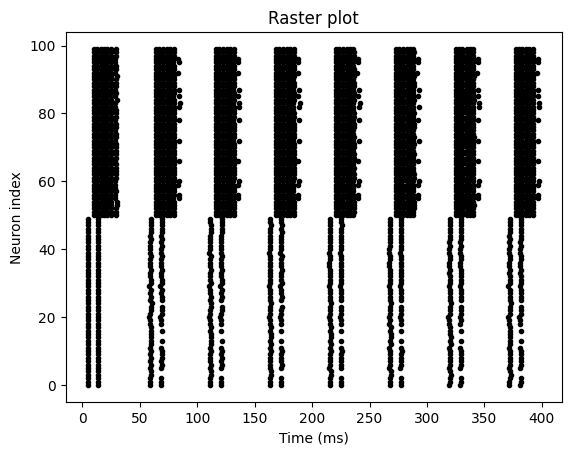

In [37]:
#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

The bursting behaviour still occurs.

Oscillations still occur but they are now faster.

Let's try with no inhibition at all. You can try it first as an exercise

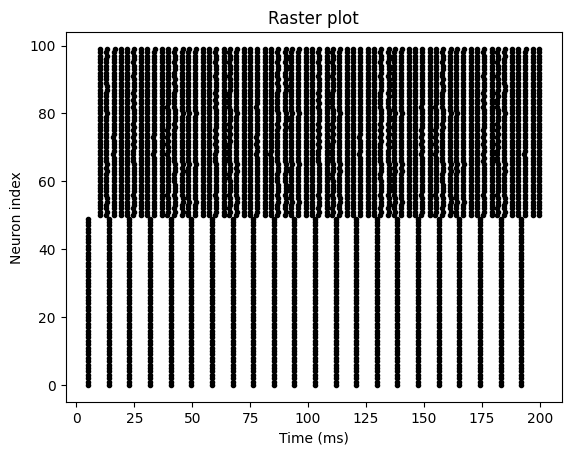

In [38]:
#Upating the connectivity matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.0+0.0*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Relaunching the simulation
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,200,0,0)

#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()


The excitatory neurons fire at a steady frequency of about 100 Hz.

The inhibitory neurons respond in a 3 to 1 ratio.

We have lost bursting and oscillations.

#### <font color='green'> **Exercice related to the inhibitory LIF network:**<font>

If you change the strength of the synaptic connection, do you still observe a one to one response?


1. Change the connection probability from *p=0.2* to values of your choosing.

What is the impact impact on the connectivity matrix?  What is the impact on the raster plot?

2. In this example, a connection had a probability of 1/2 to be excitatory and a probability of 1/2 to be inhibtory as specified by the value of pexc. Change the value of pexc.  What is the impact on the connectivity matrix?  What is the impact on the raster plot?
      

##  <font color='orange'> **An application to the zebrafish**<font>



### Introduction

**INTRODUCTION**

We reproduce the model given in **A circuit motif in the zebrafish hindbrain for a two alternative behavioral choice to turn left or right** by Koyuma et al.

This model uses a mixture of different formalisms. Most neurons are described by LIF equations while auditory cells are described by the more complex Hodgkin-Huxley equations.

The model also describes synaptic connections between individual neurons as well as **gap junctions**.

On the biological side, the model describes the neural circuit leading to the decision to turn left or right given an auditory input. The authors argue the this is a primitive circuit and that an equivalent could be found across several species.

There are three types of neurons in the model:
- The auditory neurons (VIII ganglion) that receive an external stimulus,
-The feed forward neurons (FF) receive input through gap junctions from the auditory neurons. The FF neurons send inhibitory connection to contralateral FF neurons and to Mauthner cells,
-The Mauthner cells receive excitatory inputs from auditory cells and transmit it to motor regions. Mauthner cells are much larger than FF cells leading to a smaller electrical resistance.

An important feature of the model is the presence of contralateral inhibitory connections.

Intuitively, a stimulus from one side will excite the ipsilateral Mauthner cell an indirectly inhibit the contraletaral Mauthner cell.  This helps select a single direction.

Another important feature of the model is the presence of gap junctions.  When two neurons are connected by a gap junction, we cannot model the activity of the presynaptic neurons with a LIF formalism as it doesn't describe the membrane potential during a spike.

For this reason auditory cells are described with a Hodgkin-Huxley formalism. Other cells are described by the simpler LIF formalism.


A schematic of a gap junction

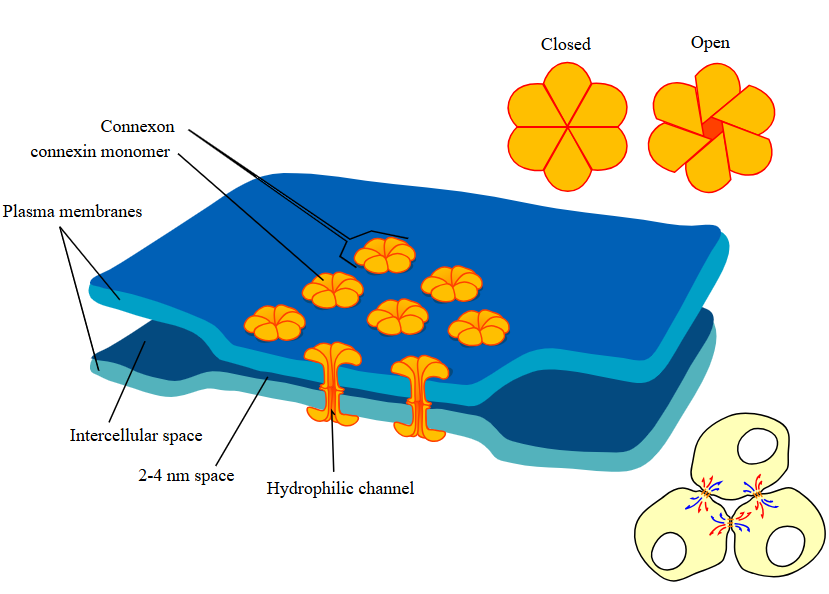

The paper describing this model provides a good example of a model that is validated by experimental data and sheds light on fundamental principles.

On the weaker side, the authors don't provide a complete list of their equations or access to a code.

We first take a look at a schematic describing the network of interest.

One could ask: 'what is the role of feedforward inhibitory neurons?'

They are not necessary to transmit the input from the nerve to the M cell.

Just by looking at the diagram, we can see that they could serve two purposes: contralateral inhibition could enhance selectivity, delayed inhibition could shorten the response of M cells.

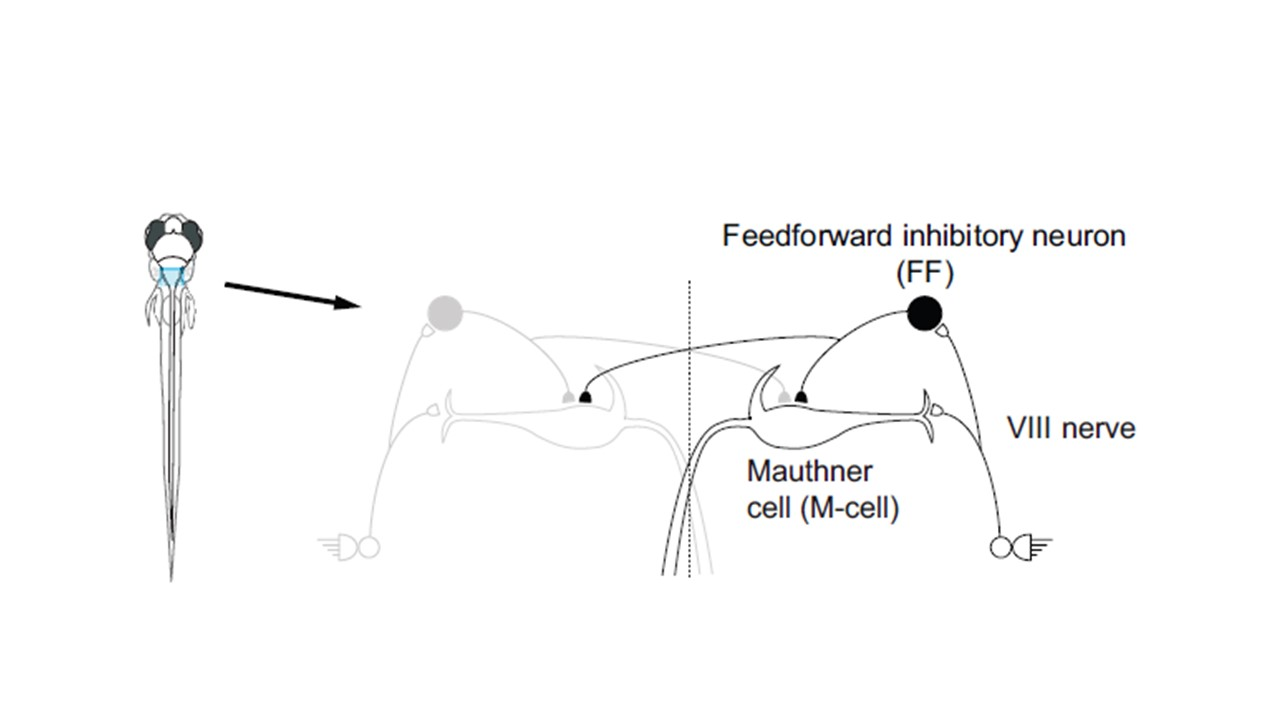

The mathematical model describing this network is shown in the following schematic.

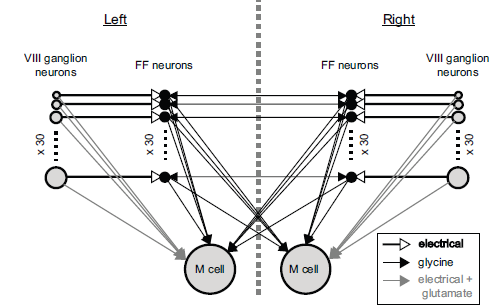

**PLAN**
The rest of this workshop  is divided in the following sections
1. Implementing and testing the equations for the LIF neurons,
2. Implementing and testing the equations for the Hodgkin-Huxley neurons,
3. Simulating a single gap junction,
5. Simulating the VIII ganglion-FF subnetwork,
6. Computing the M Cell response,
7. Testing variations of the model responses when the strength of inhibitory synapses are modified.

### The Leaky Integrate and Fire (LIF) model for the FF neurons and M cells

We start by importing the relevant libraries.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

We define a class of parameters for LIF neurons.

In [40]:
#Parameters for the LIF FF cells
class param_LIF:
  def __init__(self, Rm,Erest,ECl,Espike,tau):
    self.Rm = Rm
    self.Erest = Erest
    self.ECl= ECl
    self.Espike=Espike
    self.tau=tau

**Rm** stands for the membrane resistance of the membrane,

**Erest** represents the membrane potential of the cell when it is at rest,

**ECl** is the reversal potential of chloride currents.  The more hyperpolarized, the stronger the inhbition

**Espike** stands for the value of membrane potential at which spiking occur,

**tau** is time constant of neural response.

We specify these parameters for feedforward inhibitory neurons as well as for Mathner cells. Remark the while cells from different populations can be described by the same formalism, parameters should differ from one population to another.

In [41]:

param_ff = param_LIF(400,-77,-75,-61,10)
param_M=param_LIF(10,-79,-75,-61,10)


**We observe a notable difference:**  The *membrane resistance* is much larger for feedforwad neurons than for Mauthner cells.

As our model will include both HH neurons and LIF neurons which are discontinuous, it is impractical to use differential equations.

We will divide the time span of the simulations into discrete time steps.

We define a parameter class for the simulation duration and time step.

In [42]:
class param_Simul:
  def __init__(self,Dur,dt,Nstep):
    self.Dur = Dur
    self.dt = dt
    self.Nstep= Nstep

Dur=200
dt=0.002
Nstep=int(Dur/dt)
param_S = param_Simul(Dur,dt,Nstep)

We are now ready to define functions specifying the LIF model

In [43]:
def LIF_pot(V,I,param,param_S):
  #This function updates the membrane potential during a single time step
  #and decides if a spike occurs.
  #INPUT, V, the membrane potential,
  #INPUT, I, the current injected into the model,
  #INPUT, param the parameter of the LIF cell,
  #INTPUT, param_S the parameters of the simulation,
  #OUTPUT, Vnew, the new value of the membrane potential,
  #OUTPUT, is_spike, 1 if there is a spike during the time step, 0 otherwise
  is_spike=0
  Vnew=V+param_S.dt*((param_ff.Erest-V)/param.tau)+(param_S.dt*param.Rm*I/param.tau)
  if Vnew>param.Espike:
    Vnew=param.Erest
    is_spike=1
  return Vnew,is_spike

def LIF_Sim(Vinit,I,param,param_S):
  #This function computes the temporal response of membrane potential
  #and the spike train of a LIF neuron.
  #INPUT, Vinit, the initial value of the membrane potential potential,
  #INPUT, I, the current injected into the cell,
  #INPUT, param, parameters of the LIF model,
  #INPUT, param_S, simulation parameters.
  V_vec=np.zeros(param_S.Nstep)
  Spike_vec=np.zeros(param_S.Nstep)
  Time_vec=np.zeros(param_S.Nstep)
  V_vec[0]=Vinit
  for i in range(param_S.Nstep-1):
    V_vec[i+1],Spike_vec[i+1]=LIF_pot(V_vec[i],I,param,param_S)
    Time_vec[i+1]=Time_vec[i]+param_S.dt
  return V_vec,Spike_vec,Time_vec


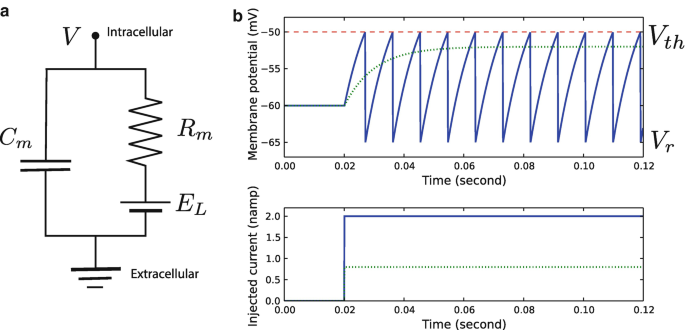

We now now run a first example of the responses of FF and M cells.  In this example, we inject a constant current of I=0.008 in each cell.  
It is sufficient to trigger a response in the FF neurons but not in M cells

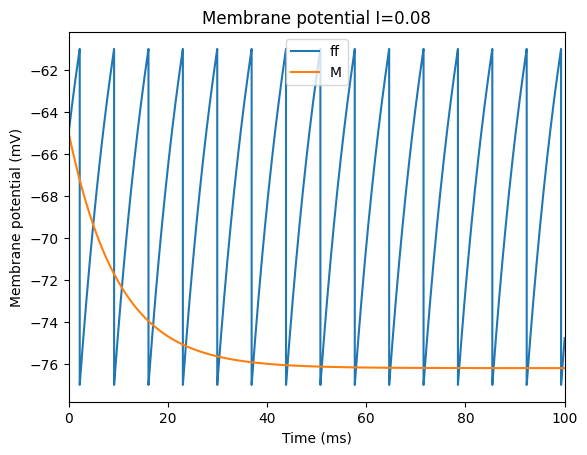

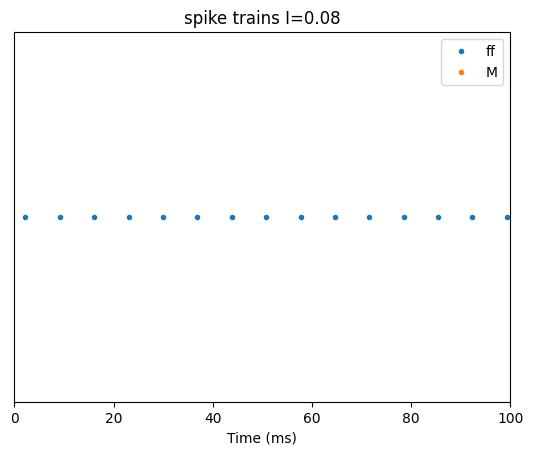

In [44]:

#We simulate responses of feedforward neurons and of Mauthner cells
V_vec_ff,Spike_vec_ff,Time_vec=LIF_Sim(-65,0.08,param_ff,param_S)
V_vec_M,Spike_vec_M,Time_vec=LIF_Sim(-65,0.08,param_M,param_S)

#We plot the results
plt.plot(Time_vec,V_vec_ff,Time_vec,V_vec_M)
plt.xlim(0,100)
plt.title('Membrane potential I=0.08')
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Time (ms)')
plt.legend(['ff', 'M'])
plt.show()

plt.plot(Time_vec,Spike_vec_ff,'.',Time_vec,Spike_vec_M,'.')
plt.ylim(0.5, 1.5)
plt.yticks([])
plt.xlim(0,100)
plt.title('spike trains I=0.08')
plt.xlabel('Time (ms)')
plt.legend(['ff', 'M'])
plt.show()

Due to the difference in membrane resistance 10 vs 400, the Mauthner cell needs a much larger current to trigger action potentials.
We relaunch the simulations with a larger current of $I=2$.  Now both cells respond an the FF cells spikes at a very high frequency

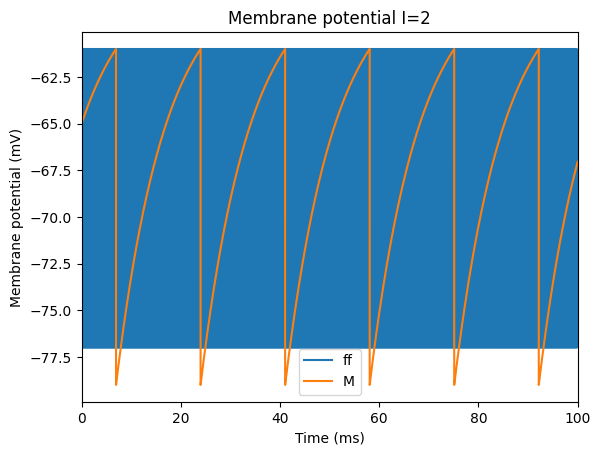

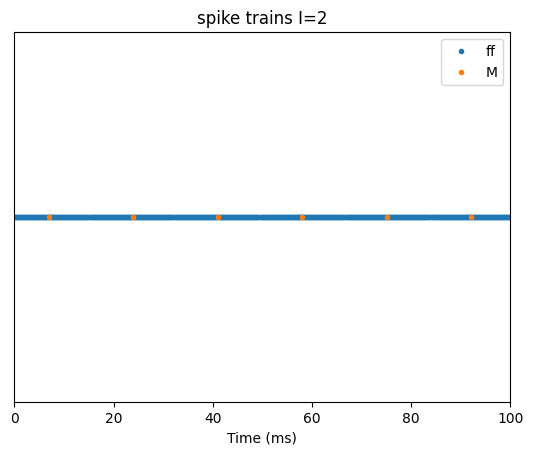

In [45]:
#We simulate responses of feedforward neurons and of Mauthner cells
V_vec_ff,Spike_vec_ff,Time_vec=LIF_Sim(-65,2,param_ff,param_S)
V_vec_M,Spike_vec_M,Time_vec=LIF_Sim(-65,2,param_M,param_S)

#We plot the results
plt.plot(Time_vec,V_vec_ff,Time_vec,V_vec_M)
plt.xlim(0,100)
plt.title('Membrane potential I=2')
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Time (ms)')
plt.legend(['ff', 'M'])
plt.show()

plt.plot(Time_vec,Spike_vec_ff,'.',Time_vec,Spike_vec_M,'.')
plt.ylim(0.5, 1.5)
plt.yticks([])
plt.xlim(0,100)
plt.title('spike trains I=2')
plt.xlabel('Time (ms)')
plt.legend(['ff', 'M'])
plt.show()

Due to the high frequency of the FF cell response, we can't see individual spikes.

We can also compute the input-firing frequency response of each cell type.

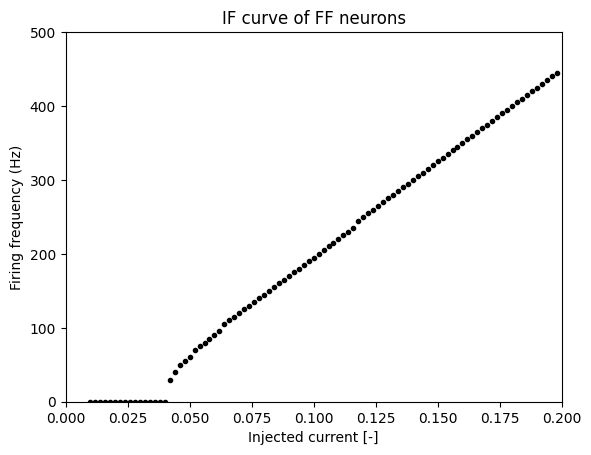

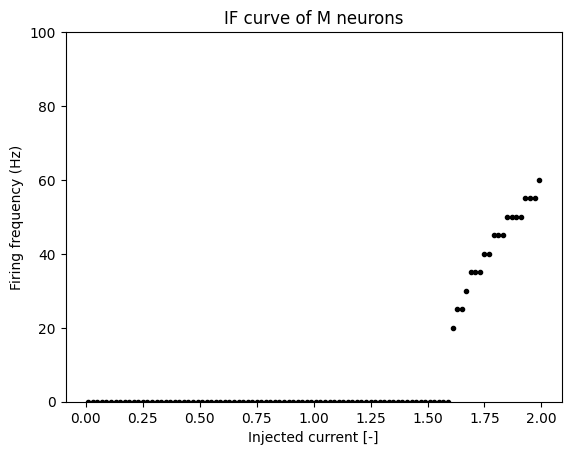

In [46]:
I_vec_ff=np.arange(0.01,0.2,0.002)
I_vec_M=np.arange(0.01,2,0.02)

Freq_vec_ff=[]
for j in I_vec_ff:
  V_vec_ff,Spike_vec_ff,Time_vec=LIF_Sim(-65,j,param_ff,param_S)
  freq_ff=0
  for k in  Spike_vec_ff:
    freq_ff=freq_ff+k
  freq_ff=freq_ff/param_S.Dur
  Freq_vec_ff.append(1000*freq_ff)



Freq_vec_M=[]
for j in I_vec_M:
  V_vec_M,Spike_vec_M,Time_vec=LIF_Sim(-65,j,param_M,param_S)
  freq_M=0
  for k in  Spike_vec_M:
    freq_M=freq_M+k
  freq_M=freq_M/param_S.Dur
  Freq_vec_M.append(1000*freq_M)


plt.plot(I_vec_ff,Freq_vec_ff,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency (Hz)')
plt.xlim(0,0.2)
plt.ylim(0, 500)
plt.title('IF curve of FF neurons')
plt.show()

plt.plot(I_vec_M,Freq_vec_M,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency (Hz)')
plt.title('IF curve of M neurons')
plt.ylim(0, 100)
plt.show()


### The Hodgkin-Huxley model for VIII ganglion cells

We now move to define the Hodgkin-Huxley model that will be used the describe the activity of auditory cells.  

An advantage of the HH model is that it provides an explicit description of the membrane potential during a spike.  

 This is essential in our model as we want to describe currents through gap junctions.

 As a downside, it requires four dynamical variables to describe action potentials.

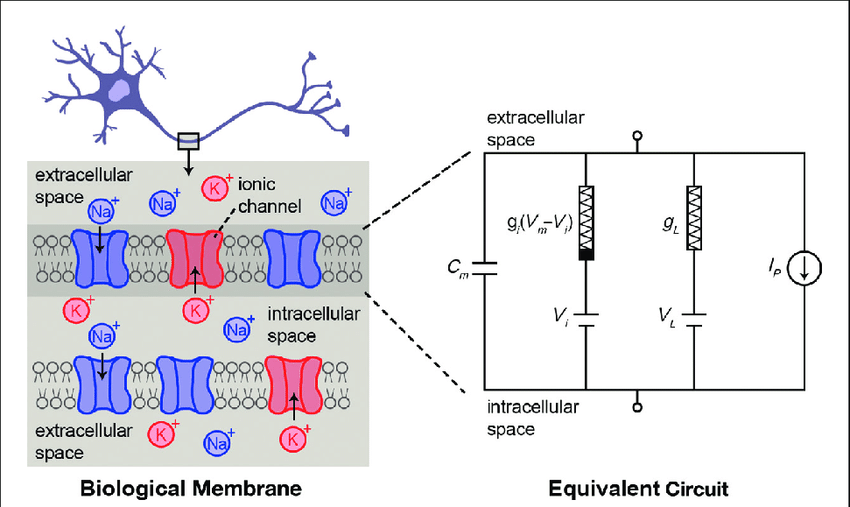

We define a parameter class for Hodgkin-Huxley models.

In [47]:
class param_HH:
  def __init__(self, EL,EK,ENa,gL,gNa,gK,SA):
    self.EL = EL
    self.EK = EK
    self.ENa= ENa
    self.gL=gL
    self.gNa=gNa
    self.gK=gK
    self.SA=SA

#Parmaters for HH auditory cell
El_A=-79
EK_A=-90
ENa_A=50
gl_A=0.3
gNa_A=120
gK_A=36
SA_A=2000 #20000

param_Aud = param_HH(El_A,EK_A,ENa_A,gl_A,gNa_A,gK_A,SA_A)


In addition of synaptic currents, three types of transmembrane currents are described in the HH model.  *Leak currents*, *sodium mediated excitatory currents* and *potassium mediated inhibitory current*.

**EL** The reversal potential of leak channels,

**EK** The reversal potentieal of potassium channels,

**ENa** The reversal potential of sodium channels,

**gl** The conductance of leak channels.

**gNa** The maximal conductance of sodium channels,

**gK** The maximal conductance of potassium channels.

While the conductance of *leak channels* remains constant, the conductance of sodium and potassium channels are determined by the opening and closing of voltage dependant gates.

We now define the auxiliairy functions involved in the opening and closing of these gates.

The form of these equations are standard but were not explicitly given in the paper. ☹

Look at the shape of the equations, what could be a problem?  There can be an 'artificial' division by zeros when both the numerator and denominator are equal to zero.  We handle this with an 'if'.

In [48]:
def alpha_m(V):
  #Opening rate of m gates.
  #INPUT, V, membrane potential,
  #OUTPUT, aplpha, opening rate.
  if abs(V+40)>0.01:
    alpha=0.1*(V+40)/(1-math.exp(-(V+40)/10))
  else:
    alpha=1
  return alpha

def beta_m(V):
  #closing rate of m gates.
  #INPUT, V, membrane potential,
  #OUTPUT, beta, closing rate.
  beta=4*math.exp(-(V+65)/18)
  return beta

def alpha_h(V):
  #opening rate of h gates.
  #INPUT, V, membrane potential,
  #OUTPUT, alpha, opening rate.
  alpha=0.07*math.exp(-(V+65)/20)
  return alpha

def beta_h(V):
  #closing rate of h gates.
  #INPUT, V, membrane potential,
  #OUTPUT, beta, closing rate.
  beta=1/(1+math.exp(-(V+35)/10))
  return beta

def alpha_n(V):
  #opening rate of n gates.
  #INPUT, V, membrane potential,
  #OUTPUT, alpha, opening rate.
  if abs(V+45)>0.01:
    alpha=.01 * ((-45-V) / (np.exp((-45-V)/5)-1))
  else:
    alpha=.05
  return alpha

def beta_n(V):
  #closing rate of n gates
  #INPUT V, membrane potential
  #OUTPUT, beta, closing rate
  beta=0.125*math.exp(-(V+35)/40)
  return beta

def m_inf(V):
  #equilibrum value of m gates
  #INPUT V, membrane potential
  #OUTPUT, m_inf, equilibrium value
  m_inf=alpha_m(V)/(alpha_m(V)+beta_m(V))
  return m_inf

def h_inf(V):
  #equilibrium value of h gates,
  #INPUT V, membrane potential
  #OUTPUT, h_inf, equilibrium value
  h_inf=alpha_h(V)/(alpha_h(V)+beta_h(V))
  return h_inf

def n_inf(V):
  #equilibrium value of n gates
  #INPUT v, membrane potential
  #OUTPUT, n_inf, equilibrium value
  n_inf=alpha_n(V)/(alpha_n(V)+beta_n(V))
  return n_inf

def tau_m(V):
  #time constant of m gates
  #INPUT V, membrane potential
  #OUTPUT tau_m, time constant
  tau_m=1/(alpha_m(V)+beta_m(V))
  return tau_m

def tau_h(V):
  #time constant of h gates
  #INPUT V, membrane potential
  #OUTPUT, tau_h, time constant
  tau_h=1/(alpha_h(V)+beta_h(V))
  return tau_h

def tau_n(V):
  #Time constant of n gates
  #INPUT V, membrane potential
  #OUTPUT, tau_n time constant
  tau_n=1/(alpha_n(V)+beta_n(V))
  return tau_n


We will now test and illustrate these auxiliary functions.

We will plot the equilibrium values and the time constant as a function of membrane potential.

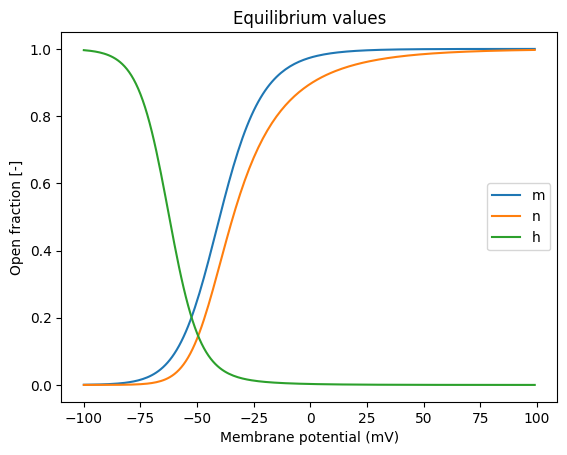

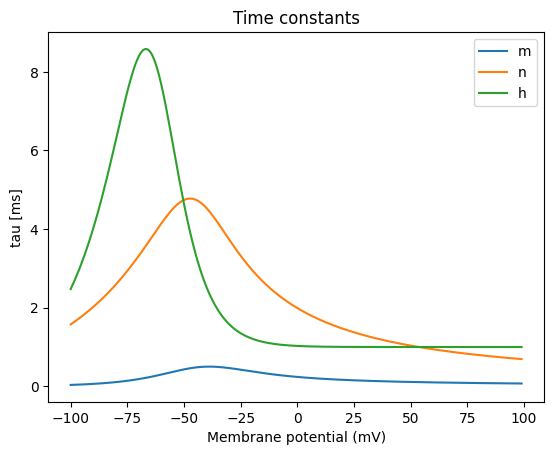

In [49]:
V_test= np.arange(-100, 100)
m_inf_test=[]
n_inf_test=[]
h_inf_test=[]
m_tau_test=[]
n_tau_test=[]
h_tau_test=[]
for j in V_test:
  m_inf_test.append(m_inf(j))
  n_inf_test.append(n_inf(j))
  h_inf_test.append(h_inf(j))
  m_tau_test.append(tau_m(j))
  n_tau_test.append(tau_n(j))
  h_tau_test.append(tau_h(j))

plt.plot(V_test,m_inf_test)
plt.plot(V_test,n_inf_test)
plt.plot(V_test,h_inf_test)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Open fraction [-]')
plt.legend(['m','n','h'])
plt.title('Equilibrium values')
plt.show()

plt.plot(V_test,m_tau_test)
plt.plot(V_test,n_tau_test)
plt.plot(V_test,h_tau_test)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('tau [ms]')
plt.legend(['m','n','h'])
plt.title('Time constants')
plt.show()




From the first figure, we see that *m* and *n* gates open when the membrane depolarizes while we observe the opposite for the *h* gate.

In the second figure, we see that the dynamics of the *m* gate are much faster than the dynamics of the *h* and *n* gates.   This justifies the often made assumption the the *m* gate is always at equilibrium.

We now define the main function of the HH model.

Again, this is standard but the equations were not given in the paper.

In [50]:
def HH_main(V,m,n,h,param,I):
  #This function returns the derivates of the variables in a HH model
  #INPUT V, m,n,h the current state of the model
  #INPUT I, external injected current
  #INPUT param, the parameter of the model
  #OUTPUT dV, dm, dn, dh, the rate of change of the variables
  IL=param.gL*(param.EL-V)
  INa=param.gNa*m*m*m*h*(param.ENa-V)
  IK=param.gK*n*n*n*(param.EK-V)
  dV=(IL+INa+IK+I)
  dm=(alpha_m(V)*(1-m)-beta_m(V)*m)
  dn=(alpha_n(V)*(1-n)-beta_n(V)*n)
  dh=(alpha_h(V)*(1-h)-beta_h(V)*h)
  return dV, dm, dn, dh

def HH_Sim(Vinit,param,param_S,I):
#This function computes the temporal response of a HH cell given a sinusoidal input
#INPUT Vinit, initial value of the simulation
#INPUT param, parameters of the HH cell
#INPUT param of the simulation
#INPUT I amplitude of the injected current
#INPUT freq, frequency of the injected current
#OUTPUT Time_vec, vector containing  the time points of the response
#OUTPUT V_vec, n_vec,m_vec,h_vec, vectors containing the responses of the variables
  V_vec=np.zeros(param_S.Nstep)
  m_vec=np.zeros(param_S.Nstep)
  n_vec=np.zeros(param_S.Nstep)
  h_vec=np.zeros(param_S.Nstep)
  Time_vec=np.zeros(param_S.Nstep)
  V_vec[0]=Vinit
  for i in range(param_S.Nstep-1):
    Iinj=I
    dV, dm, dn, dh=HH_main(V_vec[i],m_vec[i],n_vec[i],h_vec[i],param,Iinj)
    V_vec[i+1]=V_vec[i]+param_S.dt*dV
    m_vec[i+1]=m_vec[i]+param_S.dt*dm
    n_vec[i+1]=n_vec[i]+param_S.dt*dn
    h_vec[i+1]=h_vec[i]+param_S.dt*dh
    Time_vec[i+1]=Time_vec[i]+param_S.dt
  return V_vec,Time_vec,n_vec,m_vec,h_vec

We wil now run a first example to test the HH model.  

For small values of injected current, we observe no action potential.

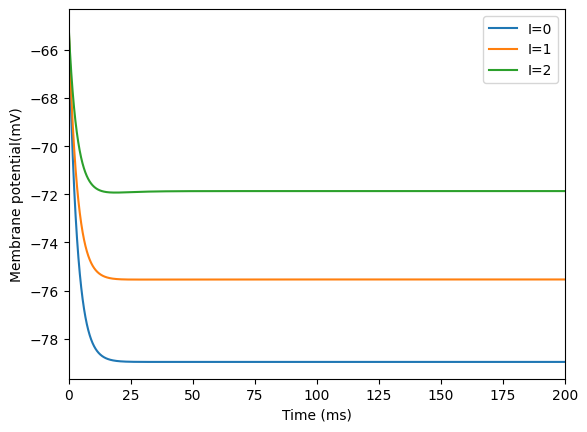

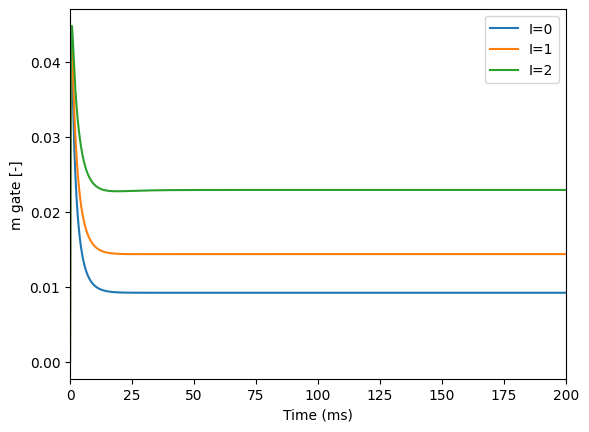

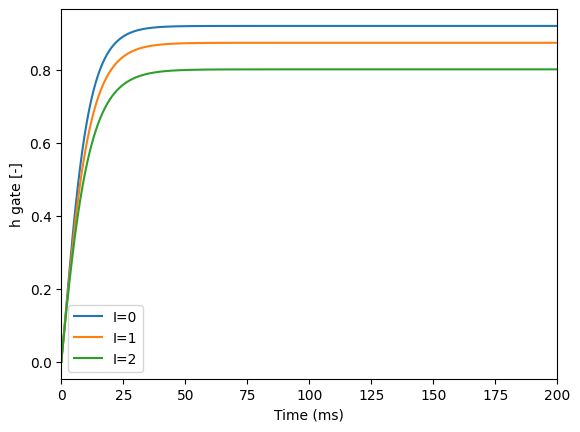

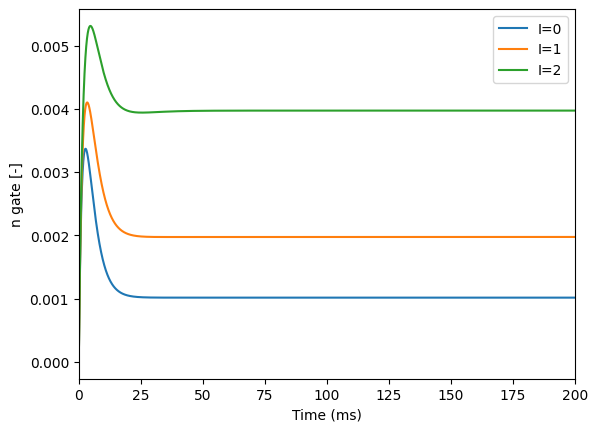

In [51]:
V_vec0,Time_vec0,n_vec0,m_vec0,h_vec0=HH_Sim(-65,param_Aud,param_S,0)
V_vec1,Time_vec1,n_vec1,m_vec1,h_vec1=HH_Sim(-65,param_Aud,param_S,1)
V_vec2,Time_vec2,n_vec2,m_vec2,h_vec2=HH_Sim(-65,param_Aud,param_S,2)

plt.plot(Time_vec0,V_vec0,Time_vec1,V_vec1,Time_vec2,V_vec2)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential(mV)')
plt.legend(['I=0','I=1','I=2'])
plt.show()

plt.plot(Time_vec0,m_vec0,Time_vec1,m_vec1,Time_vec2,m_vec2)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('m gate [-]')
plt.legend(['I=0','I=1','I=2'])
plt.show()

plt.plot(Time_vec0,h_vec0,Time_vec1,h_vec1,Time_vec2,h_vec2)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('h gate [-]')
plt.legend(['I=0','I=1','I=2'])
plt.show()

plt.plot(Time_vec0,n_vec0,Time_vec1,n_vec1,Time_vec2,n_vec2)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('n gate [-]')
plt.legend(['I=0','I=1','I=2'])
plt.show()


Let's now run some simulations with larger values of injected currents to trigger action potentials.

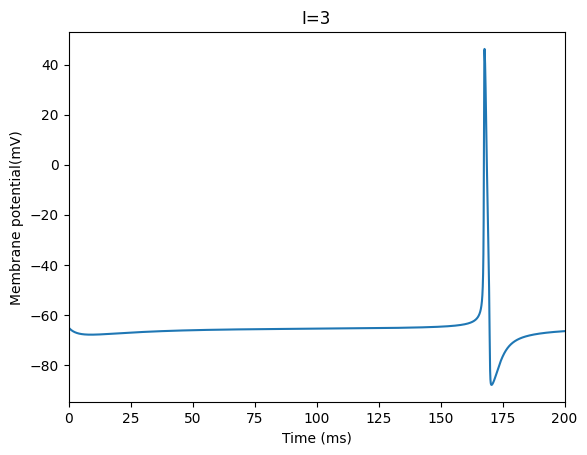

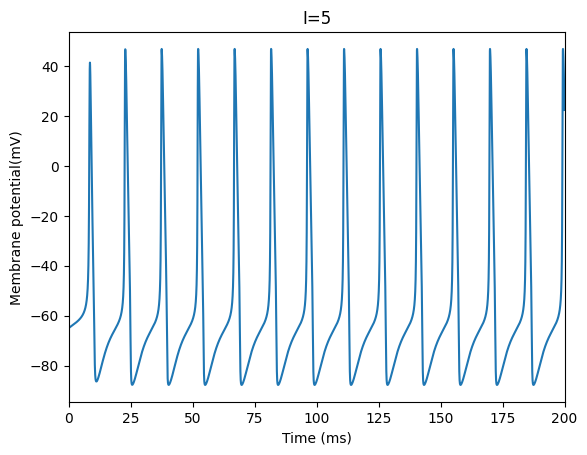

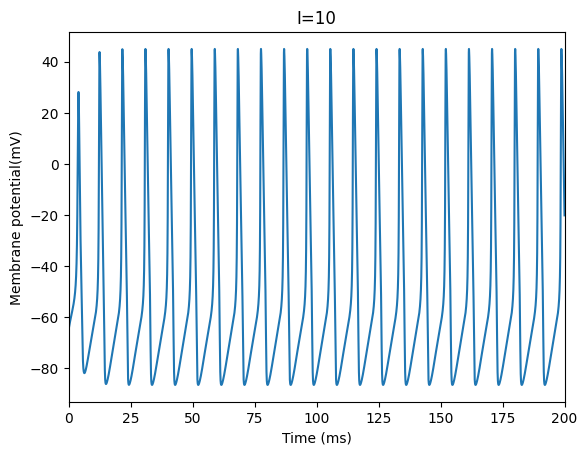

In [52]:
V_vec3,Time_vec3,n_vec3,m_vec3,h_vec3=HH_Sim(-65,param_Aud,param_S,3)
V_vec5,Time_vec5,n_vec5,m_vec5,h_vec5=HH_Sim(-65,param_Aud,param_S,5)
V_vec10,Time_vec10,n_vec10,m_vec10,h_vec10=HH_Sim(-65,param_Aud,param_S,10)

plt.plot(Time_vec3,V_vec3)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential(mV)')
plt.title('I=3')
plt.show()

plt.plot(Time_vec5,V_vec5)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential(mV)')
plt.title('I=5')
plt.show()


plt.plot(Time_vec10,V_vec10)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential(mV)')
plt.title('I=10')
plt.show()

We see that firing frequency increases with the injected current.

We can compute the input, frequency response of the HH model.

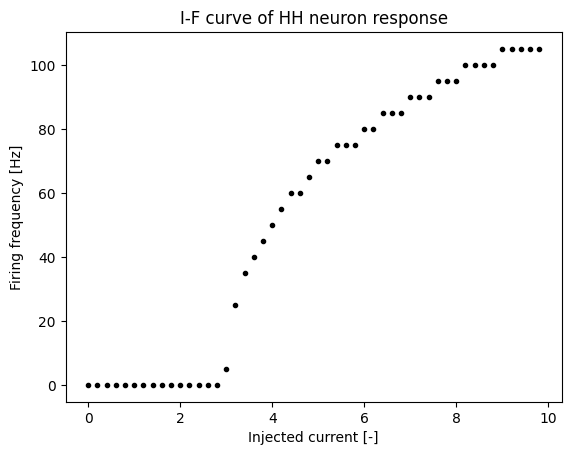

In [53]:
def freq(V_vec,time_vec):
#This function compute the mean firing frequency from the membrane potential response of the cell
#INPUT, time_vec, a vector containing the time points of the response
#INPUT, V_vec, a vector containing the value of the membrane potential response
#OUTPUT, a real number, the mean spiking frequency
  spike_count=0
  for t in range(len(time_vec)-1):
    if V_vec[t+1]>0:
      if V_vec[t]<0:
        spike_count=spike_count+1
  return 1000*spike_count/time_vec[-1]

I_vec=np.arange(0,10,0.2)
f_vec=[]
for j in I_vec:
  V_vec,Time_vec,n_vec,m_vec,h_vec=HH_Sim(-65,param_Aud,param_S,j)
  f_vec.append(freq(V_vec,Time_vec))

#We generate the figure
plt.plot(I_vec,f_vec,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency [Hz]')
plt.title('I-F curve of HH neuron response')
plt.show()


We can also test unrealistically large current values

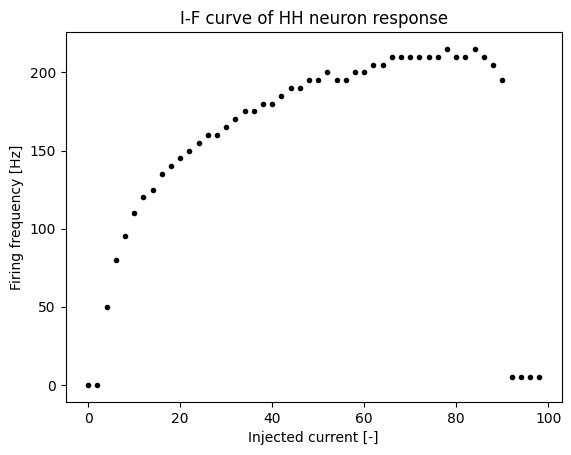

In [54]:
I_vec=np.arange(0,100,2)
f_vec=[]
for j in I_vec:
  V_vec,Time_vec,n_vec,m_vec,h_vec=HH_Sim(-65,param_Aud,param_S,j)
  f_vec.append(freq(V_vec,Time_vec))

#We generate the figure
plt.plot(I_vec,f_vec,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency [Hz]')
plt.title('I-F curve of HH neuron response')
plt.show()

Contrary the the LIF model, the spiking frequency reaches an upper and the spiking stops when too much current is injected into the cell.

###Gap junction between auditory neurons and feed forward neurons


In the model, as in the zebrafish, auditory cells are connected one to one to ipsilateral feed forward neurons.

The activity of the auditory canthus drive the activity of FF neurons.

We write a small script with one auditory neuron receiving a constant input connected through a gap junction to a FF neuron.  We compute the spiking response of the FF cell.

In [55]:
def Sim_AudFF(VinitAud,VinitFF,param_Aud,param_FF,param_S,I):
  #This function computes the membrane potential of a coupled system of an auditory and  aFF neuron,
  #An external input is applied to the auditory neuron which is connected through a gap junction to the FF neuron.
  #INPUT VinitAud, the initial membrane potential of the auditory neuron
  #INPUT VinitFF, the initial membrane potential of the ff neuron
  #INPUT param_Aud, the parameters defining the auditory neuron
  #INPUT param_FF, the parameters defining the FF cell
  #OUTPUT V_vec_HH, the membrane potential response of the auditory cell
  #OUTPT V_vec_FF, the membrane potential of the feedforwad neuron
  #OUTPUT Spike_vec_FF, the spike train of the FF neuron
  V_vec_HH=np.zeros(param_S.Nstep)
  V_vec_FF=np.zeros(param_S.Nstep)
  Spike_vec_FF=np.zeros(param_S.Nstep)
  Time_vec=np.zeros(param_S.Nstep)
  m_vec_HH=np.zeros(param_S.Nstep)
  n_vec_HH=np.zeros(param_S.Nstep)
  h_vec_HH=np.zeros(param_S.Nstep)
  gGap=0.005

  V_vec_HH[0]=VinitAud
  V_vec_FF[0]=VinitFF
  for i in range(param_S.Nstep-1):
    Igap=gGap*(V_vec_HH[i]-V_vec_FF[i])
    V_vec_FF[i+1],Spike_vec_FF[i+1]=LIF_pot(V_vec_FF[i],Igap,param_FF,param_S)
    dV, dm, dn, dh=HH_main(V_vec_HH[i],m_vec_HH[i],n_vec_HH[i],h_vec_HH[i],param_Aud,I-Igap)
    V_vec_HH[i+1]=V_vec_HH[i]+param_S.dt*dV
    m_vec_HH[i+1]=m_vec_HH[i]+param_S.dt*dm
    n_vec_HH[i+1]=n_vec_HH[i]+param_S.dt*dn
    h_vec_HH[i+1]=h_vec_HH[i]+param_S.dt*dh
    Time_vec[i+1]=Time_vec[i]+param_S.dt
  return V_vec_HH,Time_vec, V_vec_FF,Spike_vec_FF


We now run an example of this two neuron model

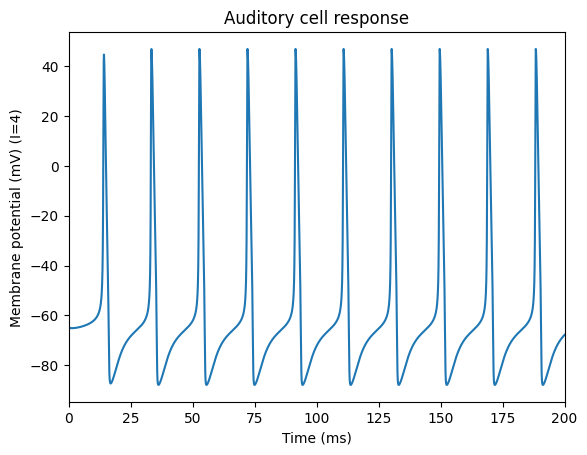

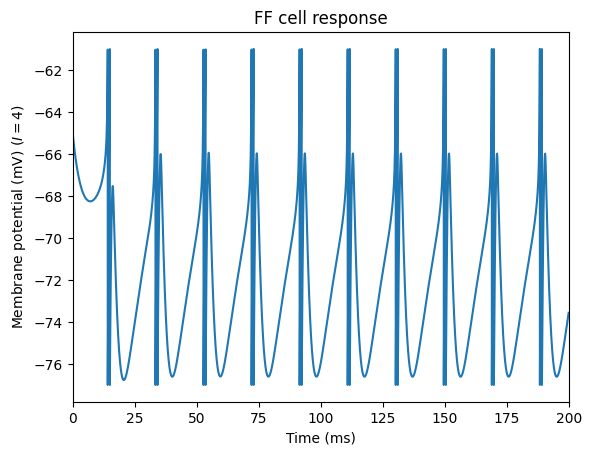

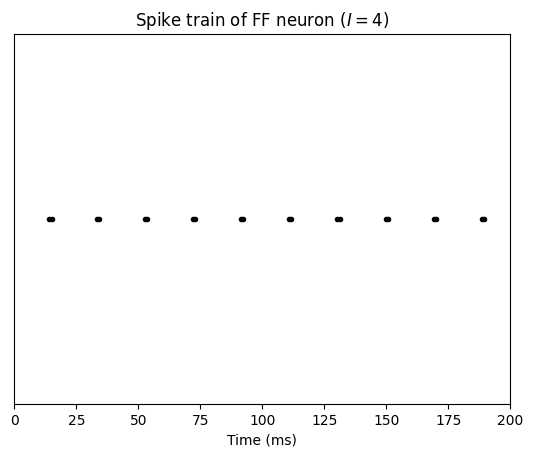

In [56]:
V_vec_HH,Time_vec, V_vec_FF,Spike_vec_FF=Sim_AudFF(-65,-65,param_Aud,param_ff,param_S,4)
plt.plot(Time_vec,V_vec_HH)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV) (I=4)')
plt.title('Auditory cell response')
plt.show()

plt.plot(Time_vec,V_vec_FF)
plt.xlim(0,200)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV) ($I=4$)')
plt.title('FF cell response')
plt.show()

plt.plot(Time_vec,Spike_vec_FF,'.k')
plt.xlim(0,200)
plt.ylim(0.5,1.5)
plt.xlabel('Time (ms)')
plt.title('Spike train of FF neuron ($I=4$)')
plt.yticks([])
plt.show()

We can also compute the IF curve of the connected FF cell.

Here, *I* stands for the intensity of the current injected into the auditory cell.

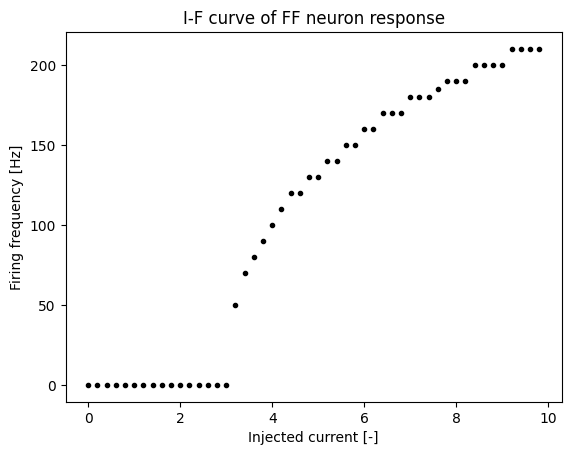

In [57]:
I_vec=np.arange(0,10,0.2)
f_vec=[]
for j in I_vec:
  V_vec_HH,Time_vec, V_vec_FF,Spike_vec_FF=Sim_AudFF(-65,-65,param_Aud,param_ff,param_S,j)
  spikecount=0
  for k in Spike_vec_FF:
    spikecount=spikecount+k
  f_vec.append(1000*spikecount/Time_vec[-1])

plt.plot(I_vec,f_vec,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency [Hz]')
plt.title('I-F curve of FF neuron response')
plt.show()


Again, we can test what happens when we inject very large current values to test the limit behaviour of the model

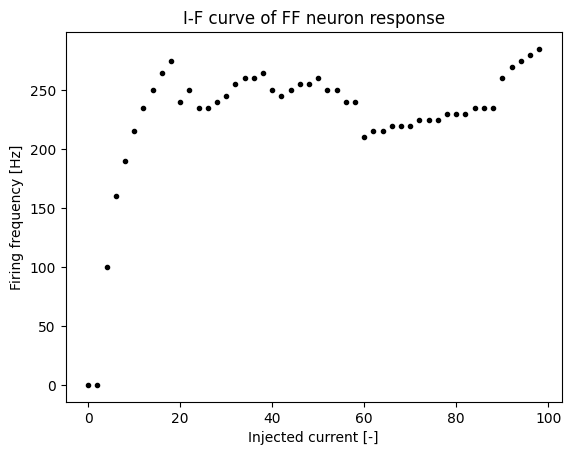

In [58]:
I_vec=np.arange(0,100,2)
f_vec=[]
for j in I_vec:
  V_vec_HH,Time_vec, V_vec_FF,Spike_vec_FF=Sim_AudFF(-65,-65,param_Aud,param_ff,param_S,j)
  spikecount=0
  for k in Spike_vec_FF:
    spikecount=spikecount+k
  f_vec.append(1000*spikecount/Time_vec[-1])

plt.plot(I_vec,f_vec,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency [Hz]')
plt.title('I-F curve of FF neuron response')
plt.show()

We observe that the frequency of the response of the FF cell stabilizes aroung 250 Hz.



<font color='green'> Exercise <font>

We observe that the last graph is very irregular, why do you think that is?  How would you make it more regular?

### The partial network with auditory cells and FF cells

**NETWORK**

In the previous section, we investigated a system of  one auditory cell and only one FF cell.

Let's now take into account the network structure.

There are 30 auditory left neurons and 30 auditory right neurons.

There are 30 FF left neurons and 30 FF right neurons.

There are one to one gap connections between auditory neurons and ipsilateral FF neurons.

Furthermore, there are inhibitory connections from FF neurons to contralateral ff neurons. These lateral connections are essential for decision making.

In this notebook, we use 5 FF cells and 5 VIII neurons on each side to speed up computation. The student can try changing this number.

In [59]:
def HH_multi(Vinit,param_FF,param_Aud,param_S,n_L,n_R,I_L,I_R):
#This function computes the temporal response of a HH cell given a sinusoidal input
#INPUT Vinit, initial value of the simulation
#INPUT param, parameters of the HH cell
#INPUT param of the simulation
#INPUT n_L, n_R number of left and right auditory cells
#INPUT I_L, I_R amplitude of the left and right injected current
#INPUT freq, frequency of the injected current
#OUTPUT Time_vec, a vector containg the time points of the simulation
#OUTPUT V_vec_FFL, V_vec_FFR, arrays containing the membrane potential of FF neurons
#OUTPUT V_vec_HHL, V_vec_HHR,  arrays containing the membrane potential of auditory neurons
#OUTPUT Spike_vec_FFL,Spike_vec_FF, arrays containing the spike trains of FF neurons

#Initializing variables
  V_vec_FFL=np.zeros((n_L,param_S.Nstep))
  V_vec_FFR=np.zeros((n_R,param_S.Nstep))
  g_gly_L=np.zeros((n_R,param_S.Nstep))
  g_gly_R=np.zeros((n_R,param_S.Nstep))
  V_vec_HHL=np.zeros((n_L,param_S.Nstep))
  V_vec_HHR=np.zeros((n_R,param_S.Nstep))
  m_vec_L=np.zeros((n_L,param_S.Nstep))
  m_vec_R=np.zeros((n_R,param_S.Nstep))
  n_vec_L=np.zeros((n_L,param_S.Nstep))
  n_vec_R=np.zeros((n_R,param_S.Nstep))
  h_vec_L=np.zeros((n_L,param_S.Nstep))
  h_vec_R=np.zeros((n_R,param_S.Nstep))
  Spike_vec_FFL=np.zeros((n_L,param_S.Nstep))
  Spike_vec_FFR=np.zeros((n_R,param_S.Nstep))
  Time_vec=np.zeros(param_S.Nstep)

  for j in range(n_L):
    V_vec_FFL[j][0]=Vinit
    V_vec_HHL[j][0]=Vinit
  for j in range(n_R):
    V_vec_FFR[j][0]=Vinit
    V_vec_HHR[j][0]=Vinit

  delay=int(0.3/param_S.dt)

  for t in range(param_S.Nstep-1):
    Time_vec[t+1]=Time_vec[t]+param_S.dt
    #Updating the synaptic weights
    for j in range(n_L):
      g_gly_L[j][t+1]=g_gly_L[j][t]*(1-0.5*param_S.dt)
      if t>delay:
        for k in range(n_R):
          g_gly_L[j][t+1]=g_gly_L[j][t+1]+0.02*Spike_vec_FFR[k][t-delay]

    for j in range(n_R):
      g_gly_R[j][t+1]=g_gly_R[j][t]*(1-0.5*param_S.dt)
      if t>delay:
        for k in range(n_R):
          g_gly_R[j][t+1]=g_gly_R[j][t+1]+0.02*Spike_vec_FFL[k][t-delay]

    #updating left cells
    for j in range(n_L):
      Igap=0.005*(V_vec_HHL[j][t]-V_vec_FFL[j][t])
      dV, dm, dn, dh=HH_main(V_vec_HHL[j][t],m_vec_L[j][t],n_vec_L[j][t],h_vec_L[j][t],param_Aud,I_L-Igap)
      V_vec_HHL[j][t+1]=V_vec_HHL[j][t]+param_S.dt*dV
      m_vec_L[j][t+1]=m_vec_L[j][t]+param_S.dt*dm
      n_vec_L[j][t+1]=n_vec_L[j][t]+param_S.dt*dn
      h_vec_L[j][t+1]=h_vec_L[j][t]+param_S.dt*dh
      Isyn=g_gly_L[j][t+1]*(-75-V_vec_FFL[j][t])
      V_vec_FFL[j][t+1],Spike_vec_FFL[j][t+1]=LIF_pot(V_vec_FFL[j][t],Igap+Isyn,param_FF,param_S)

    #updating right cells
    for j in range(n_L):
      Igap=0.005*(V_vec_HHR[j][t]-V_vec_FFR[j][t])
      dV, dm, dn, dh=HH_main(V_vec_HHR[j][t],m_vec_R[j][t],n_vec_R[j][t],h_vec_R[j][t],param_Aud,I_R-Igap)
      V_vec_HHR[j][t+1]=V_vec_HHR[j][t]+param_S.dt*dV
      m_vec_R[j][t+1]=m_vec_R[j][t]+param_S.dt*dm
      n_vec_R[j][t+1]=n_vec_R[j][t]+param_S.dt*dn
      h_vec_R[j][t+1]=h_vec_R[j][t]+param_S.dt*dh
      Isyn=g_gly_R[j][t+1]*(-75-V_vec_FFR[j][t])
      V_vec_FFR[j][t+1],Spike_vec_FFR[j][t+1]=LIF_pot(V_vec_FFR[j][t],Igap+Isyn,param_FF,param_S)

  return Time_vec,V_vec_FFL, V_vec_FFR,V_vec_HHL, V_vec_HHR, Spike_vec_FFL,Spike_vec_FFR

Let's test this with a injected current which is stronger on right side than on the left side.  In this example the current strength on each side are sufficient to trigger trains of action potentials.

In [60]:
Time_vec,V_vec_FFL, V_vec_FFR,V_vec_HHL, V_vec_HHR, Spike_vec_FFL,Spike_vec_FFR=HH_multi(-65,param_ff, param_Aud,param_S,5,5,5,10)

Let's plot the results

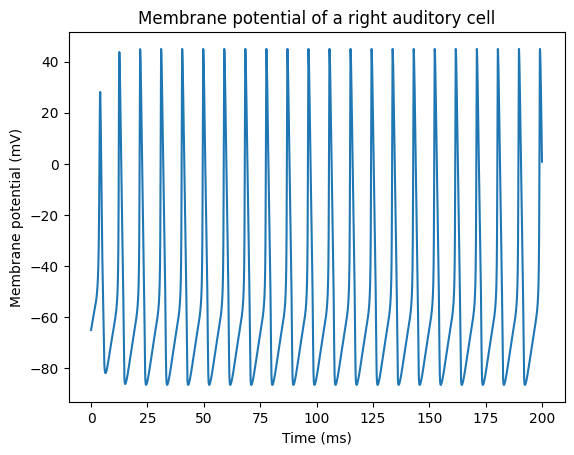

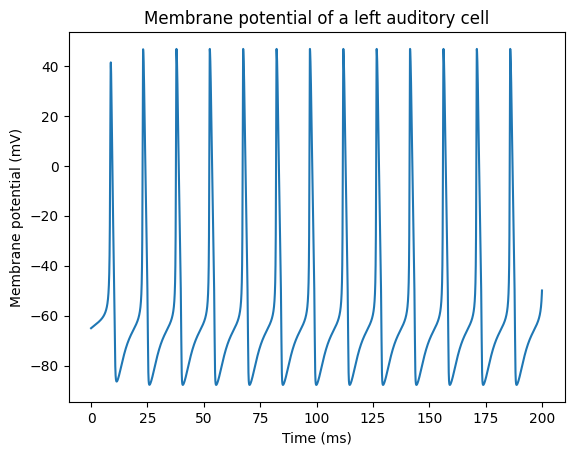

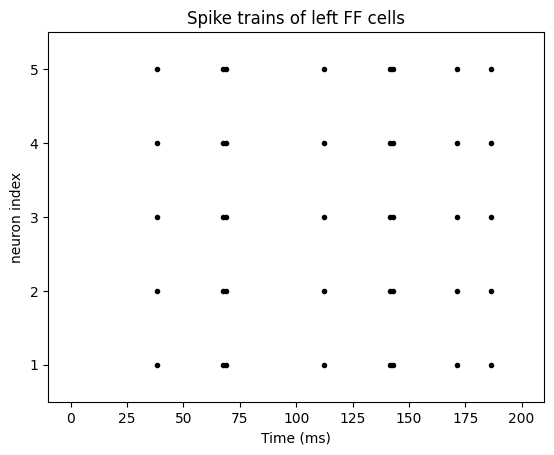

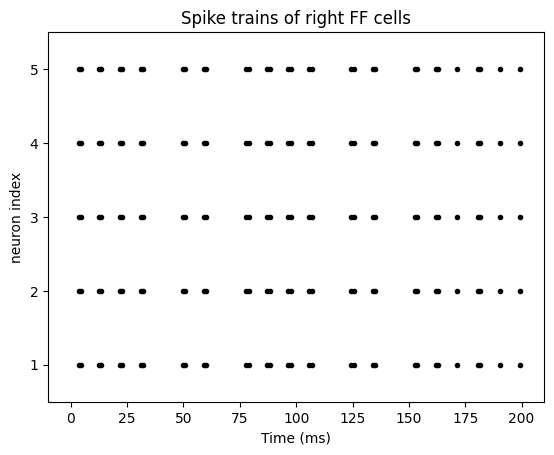

In [ ]:
plt.plot(Time_vec,V_vec_HHR[1])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential of a right auditory cell')
plt.show()

plt.plot(Time_vec,V_vec_HHL[1])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential of a left auditory cell')
plt.show()

for j in range(5):
  my_new_list = [i * (j+1) for i in Spike_vec_FFL[j]]
  plt.plot(Time_vec,my_new_list,'.k')
plt.ylim(0.5, 5.5)
plt.ylabel('neuron index')
plt.xlabel('Time (ms)')
plt.title('Spike trains of left FF cells')
plt.show()

for j in range(5):
  my_new_list = [i * (j+1) for i in Spike_vec_FFR[j]]
  plt.plot(Time_vec,my_new_list,'.k')
plt.ylim(0.5, 5.5)
plt.xlabel('Time (ms)')
plt.ylabel('neuron index')
plt.title('Spike trains of right FF cells')
plt.show()


###Modelling the response of Mauthner cells

Finally, we are now ready to compute the response of the Mauthner cells.

Mauthner cells are connected through gap junctions to auditory cells.  They also receive excitatory synaptic connections.  

Mauthner cells receive inhibitory synaptic connections from FF neurons these connections are stronger when they are contralateral than ipsilateral.

We define a function that allows to modify the strength of synaptic connections onto the Mauthner cells.

In [61]:
def M_response(param_M,param_S,n_L,n_R,V_aud_L,V_aud_R,Spike_vecLff,Spike_vecRff,ggap,gglu,ggly):
  #This function computes the response of the M cells for a given activity pattern of Auditory cells and FF cells
  #INPUT, param_M, parameters of M cells
  #INPUT, param_S, parameters of the simulation
  #INPUT, n_L, n_R the number of left and right cells
  #INPUT, V_aud_L, V_aud_R, membrane potential of left and right auditory cells
  #INPUT, Spike_vecLff, Spike_vecRff, spike train of FF cells
  #OUTPUT, V_vec_LM, V_vec_LR, membrane potential of the left and right Mauthner cells
  #OUTPUT, Spike_vec_LM,Spike_vec_RM, spike trains of the left and right Mauthner cells

  V_vec_LM=np.zeros(param_S.Nstep)
  V_vec_RM=np.zeros(param_S.Nstep)
  Spike_vec_LM=np.zeros(param_S.Nstep)
  Spike_vec_RM=np.zeros(param_S.Nstep)
  g_gly_L=np.zeros(param_S.Nstep)
  g_gly_R=np.zeros(param_S.Nstep)
  g_glu_L=np.zeros(param_S.Nstep)
  g_glu_R=np.zeros(param_S.Nstep)
  Vinit=-65
  V_vec_LM[0]=Vinit
  V_vec_RM[0]=Vinit

  #Computing the spike trains of auditory cells
  Spike_vec_LHH=np.zeros((n_L,param_S.Nstep))
  Spike_vec_RHH=np.zeros((n_R,param_S.Nstep))

  for j in range(n_L):
    for t  in range(param_S.Nstep-1):
      if V_aud_L[j][t+1]>0:
        if V_aud_L[j][t]<0:
          Spike_vec_LHH[j][t]=1

  for j in range(n_R):
    for t  in range(param_S.Nstep-1):
      if V_aud_R[j][t+1]>0:
        if V_aud_R[j][t]<0:
          Spike_vec_RHH[j][t]=1

  #Computing the glutamate synaptic weight
  delay=int(0.7/param_S.dt)
  for t in range(param_S.Nstep-1):
    g_glu_L[t+1]=g_glu_L[t]*(1-0.5*param_S.dt)
    if t>delay:
      for j in range(n_L):
        g_glu_L[t+1]=g_glu_L[t+1]+gglu*0.02*Spike_vec_LHH[j][t-delay]

  for t in range(param_S.Nstep-1):
    g_glu_R[t+1]=g_glu_R[t]*(1-0.5*param_S.dt)
    if t>delay:
      for j in range(n_R):
        g_glu_R[t+1]=g_glu_R[t+1]+gglu*0.02*Spike_vec_RHH[j][t-delay]

  #Computing the glycine synaptic weight
  delay=int(0.3/param_S.dt)
  for t in range(param_S.Nstep-1):
    g_gly_L[t+1]=g_gly_L[t]*(1-0.5*param_S.dt)
    if t>delay:
      for j in range(n_L):
        g_gly_L[t+1]=g_gly_L[t+1]+0.02*ggly*Spike_vecLff[j][t-delay]
      for j in range(n_R):
        g_gly_L[t+1]=g_gly_L[t+1]+0.05*ggly*Spike_vecRff[j][t-delay]

  for t in range(param_S.Nstep-1):
    g_gly_R[t+1]=g_gly_R[t]*(1-0.5*param_S.dt)
    if t>delay:
      for j in range(n_R):
        g_gly_R[t+1]=g_gly_R[t+1]+0.02*ggly*Spike_vecRff[j][t-delay]
      for j in range(n_R):
        g_gly_R[t+1]=g_gly_R[t+1]+0.05*ggly*Spike_vecLff[j][t-delay]


  for t in range(param_S.Nstep-1):
  #Updating the state of the left Mauthner cell
    igapL=0
    for x in range(n_L):
      igapL=igapL+0.01*ggap*(V_aud_L[x][t]-V_vec_LM[t])
    igluL=g_glu_L[t+1]*(0-V_vec_LM[t])
    iglyL=g_gly_L[t+1]*(-75-V_vec_LM[t])
    Iinj=igapL+igluL+iglyL
    V_vec_LM[t+1],Spike_vec_LM[t+1]=LIF_pot(V_vec_LM[t],Iinj,param_M,param_S)

  #Updating the state of the right Mauthner cell
    igapR=0
    for x in range(n_L):
      igapR=igapR+0.01*ggap*(V_aud_R[x][t]-V_vec_RM[t])
    igluR=g_glu_R[t+1]*(0-V_vec_RM[t])
    iglyR=g_gly_R[t+1]*(-75-V_vec_RM[t])
    Iinj=igapR+igluR+iglyR
    V_vec_RM[t+1],Spike_vec_RM[t+1]=LIF_pot(V_vec_RM[t],Iinj,param_M,param_S)
  return V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM



Let's test this function with 'normal' synaptic strenght and a normal strength of gap junction connection.

In [62]:
V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM=M_response(param_M,param_S,5,5,V_vec_HHL,V_vec_HHR,Spike_vec_FFL,Spike_vec_FFR,1,1,1)

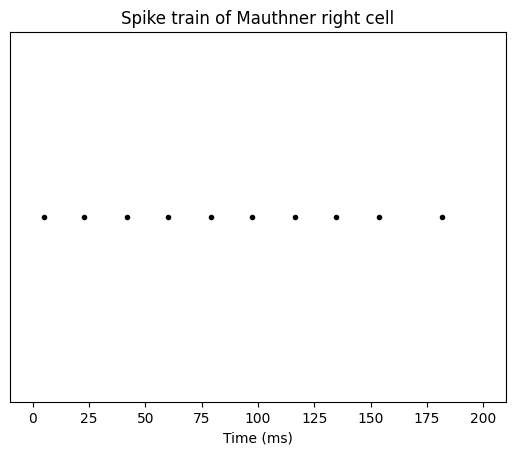

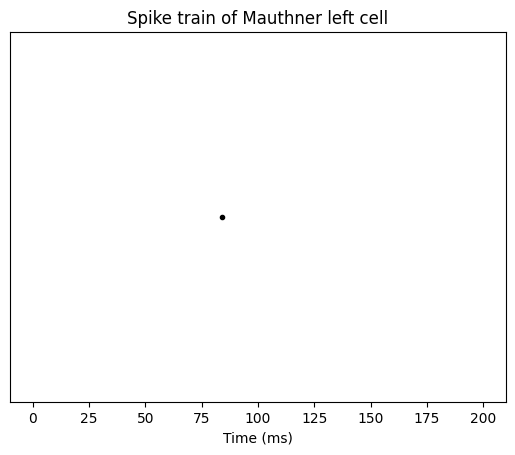

In [63]:
plt.plot(Time_vec,Spike_vec_RM,'.k')
plt.xlabel('Time (ms)')
plt.ylim(0.5, 1.5)
plt.yticks([])
plt.title('Spike train of Mauthner right cell')
plt.show()

plt.plot(Time_vec,Spike_vec_LM,'.k')
plt.xlabel('Time (ms)')
plt.ylim(0.5, 1.5)
plt.yticks([])
plt.title('Spike train of Mauthner left cell')
plt.show()

We observe that the response of the M cell on the side of the dominant input is much stronger than the response of the contralateral cell.   

We will now investigate how the response of M cells of each side depend on the input strength and on the strength of the inhibitory connections.

###Testing several cases

Now that the model is implemented we can use it to test how it responds to several scenarios.

-What is the impact of inhibition?

-What is the impact of contralateral input?

#### Testing the impact of inhibition

We begin by testing how the strength of inhibition shapes the response of Mauthner cells

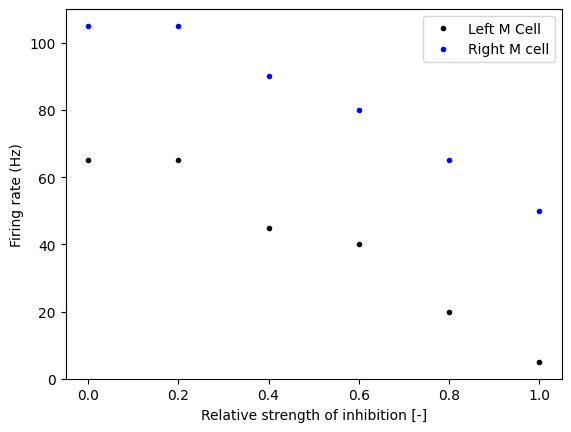

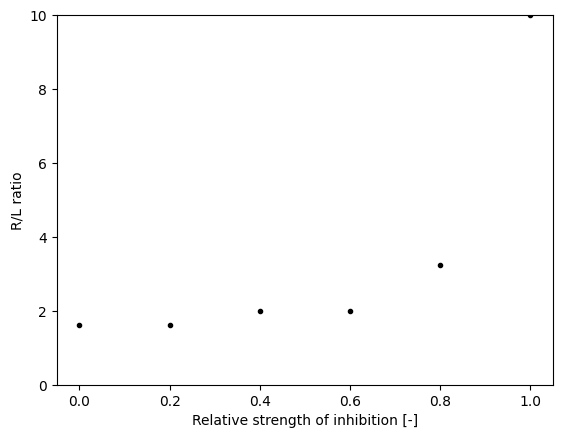

In [64]:
gvec=np.arange(0,1.2,0.2)
Lfvec=[]
Rfvec=[]
ratio=[]
for j in gvec:
  V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM=M_response(param_M,param_S,5,5,V_vec_HHL,V_vec_HHR,Spike_vec_FFL,Spike_vec_FFR,1,1,j)
  spL=0
  spR=0
  for k in Spike_vec_LM:
    spL=spL+k
  for k in Spike_vec_RM:
    spR=spR+k
  Lfvec.append(1000*spL/Time_vec[-1])
  Rfvec.append(1000*spR/Time_vec[-1])
  ratio.append(spR/spL)

plt.plot(gvec,Lfvec,'.k',gvec,Rfvec,'.b')
plt.ylabel('Firing rate (Hz)')
plt.xlabel('Relative strength of inhibition [-]')
plt.legend(['Left M Cell', 'Right M cell'])
plt.show()

plt.plot(gvec,ratio,'.k')
plt.ylabel('R/L ratio')
plt.xlabel('Relative strength of inhibition [-]')
plt.ylim(0,10)
plt.show()



We see that inhibition increases the selective nature of the response.

#### The impact of contralateral input

One could ask whether a signal on one side affects the response of the contralateral Mauthner cell.

We repeat the experiment above but with the signal on a single side

In [65]:
Time_vec,V_vec_FFL, V_vec_FFR,V_vec_HHL, V_vec_HHR, Spike_vec_FFL,Spike_vec_FFR=HH_multi(-65,param_ff, param_Aud,param_S,5,5,0,10)

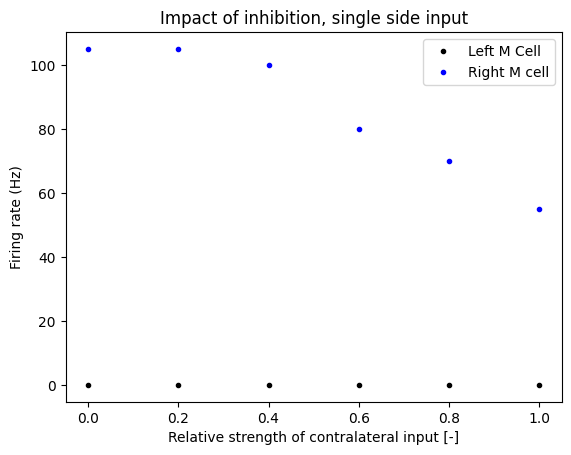

In [66]:
gvec=np.arange(0,1.2,0.2)
Lfvec=[]
Rfvec=[]
ratio=[]
for j in gvec:
  V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM=M_response(param_M,param_S,5,5,V_vec_HHL,V_vec_HHR,Spike_vec_FFL,Spike_vec_FFR,1,1,j)
  spL=0
  spR=0
  for k in Spike_vec_LM:
    spL=spL+k
  for k in Spike_vec_RM:
    spR=spR+k
  Lfvec.append(1000*spL/Time_vec[-1])
  Rfvec.append(1000*spR/Time_vec[-1])


plt.plot(gvec,Lfvec,'.k',gvec,Rfvec,'.b')
plt.ylabel('Firing rate (Hz)')
plt.xlabel('Relative strength of contralateral input [-]')
plt.legend(['Left M Cell', 'Right M cell'])
plt.title('Impact of inhibition, single side input')
plt.show()

We see that the contralateral M cells doesn't emit any spike.

We also observe that the response of the ipsilateral cell is the same as in the previous case.

We now test the case where the inputs on both side are equal

In [ ]:
Time_vec,V_vec_FFL, V_vec_FFR,V_vec_HHL, V_vec_HHR, Spike_vec_FFL,Spike_vec_FFR=HH_multi(-65,param_ff, param_Aud,param_S,5,5,10,10)

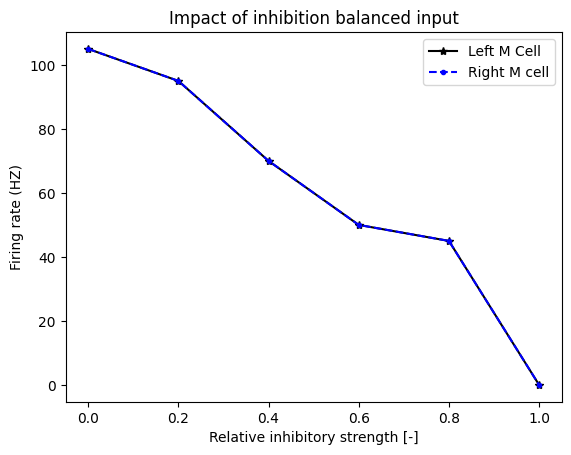

In [ ]:
gvec=np.arange(0,1.2,0.2)
Lfvec=[]
Rfvec=[]
ratio=[]
for j in gvec:
  V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM=M_response(param_M,param_S,5,5,V_vec_HHL,V_vec_HHR,Spike_vec_FFL,Spike_vec_FFR,1,1,j)
  spL=0
  spR=0
  for k in Spike_vec_LM:
    spL=spL+k
  for k in Spike_vec_RM:
    spR=spR+k
  Lfvec.append(1000*spL/Time_vec[-1])
  Rfvec.append(1000*spR/Time_vec[-1])

plt.plot(gvec,Lfvec,'-*k',gvec,Rfvec,'--.b')
plt.xlabel('Relative inhibitory strength [-]')
plt.ylabel('Firing rate (HZ)')
plt.legend(['Left M Cell', 'Right M cell'])
plt.title('Impact of inhibition balanced input')
plt.show()

We obtain the intuitive result that when inhibition is at its normal level, there is no directional response to stimuli of equal strength on each side.

Finally, we fix the strength of  inhibition to its normal value and vary the strength of the contralateral input.

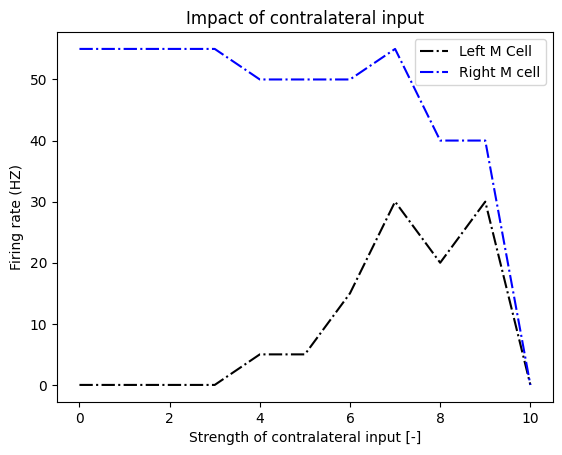

In [ ]:
I_vec=np.arange(0,11,1)
Lfvec=[]
Rfvec=[]
for j in I_vec:
  Time_vec,V_vec_FFL, V_vec_FFR,V_vec_HHL, V_vec_HHR, Spike_vec_FFL,Spike_vec_FFR=HH_multi(-65,param_ff, param_Aud,param_S,5,5,j,10)
  V_vec_LM, V_vec_RM,Spike_vec_LM,Spike_vec_RM=M_response(param_M,param_S,5,5,V_vec_HHL,V_vec_HHR,Spike_vec_FFL,Spike_vec_FFR,1,1,1)
  spL=0
  spR=0
  for k in Spike_vec_LM:
    spL=spL+k
  for k in Spike_vec_RM:
    spR=spR+k
  Lfvec.append(1000*spL/Time_vec[-1])
  Rfvec.append(1000*spR/Time_vec[-1])

plt.plot(I_vec,Lfvec,'-.k',I_vec,Rfvec,'-.b')
plt.xlabel('Strength of contralateral input [-]')
plt.ylabel('Firing rate (HZ)')
plt.legend(['Left M Cell', 'Right M cell'])
plt.title('Impact of contralateral input')
plt.show()

We observe that the response of the dominant side diminishes as the strength of the contralateral input is increased.  

This effect is very non linear.

<font color='green'> **Exercices** <font>


*   How is this impacted by the number of neurons?
*   What happens if the strength of the input is increased on both side?
*   What is the effect of changing the strength of glutamatergic connections?





## Conclusion

We presented two types of mathematical models describing the activity of neurons.  The Hodgkin-Huxley and the Leaky Integrate and Fire model.  The HH model is more complex and allows to track the membrane potential during an action potential.  The simplicity of the LIF model makes it easy to use un neural network.

Mathematical models can help understand specific biological networks. In this presentation, we presented a simple network with which the zebrafish decides to turn left or right.

Mathematical model help elucidate the role of interneuron inhibition in this network.  Inhibition increases the relative strength of the response on the side of the dominant signal.   Somewhat spectacularly, when the input is of equal strength on both sides, none of the Mauthner cell respond.